<a href="https://colab.research.google.com/github/123Datou123/EKF-learning/blob/master/%E5%8F%82%E6%95%B0%E6%8B%9F%E5%90%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##原始代码


<ipython-input-38-648df4ad4ed7>:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  S[t] = S[t-1] - ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1]
<ipython-input-38-648df4ad4ed7>:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  E[t] = E[t-1] + ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1] - (beta + delta_E) * E[t-1]


True alpha: 0.13
Fitted alpha using T'=5 days: 0.1299612387036908


<ipython-input-38-648df4ad4ed7>:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  S[t] = S[t-1] - ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1]
<ipython-input-38-648df4ad4ed7>:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  E[t] = E[t-1] + ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1] - (beta + delta_E) * E[t-1]
<ipython-input-38-648df4ad4ed7>:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  S[t] = S[t-1] - ((alpha * E[t-1] / N) + (alpha * I[t-

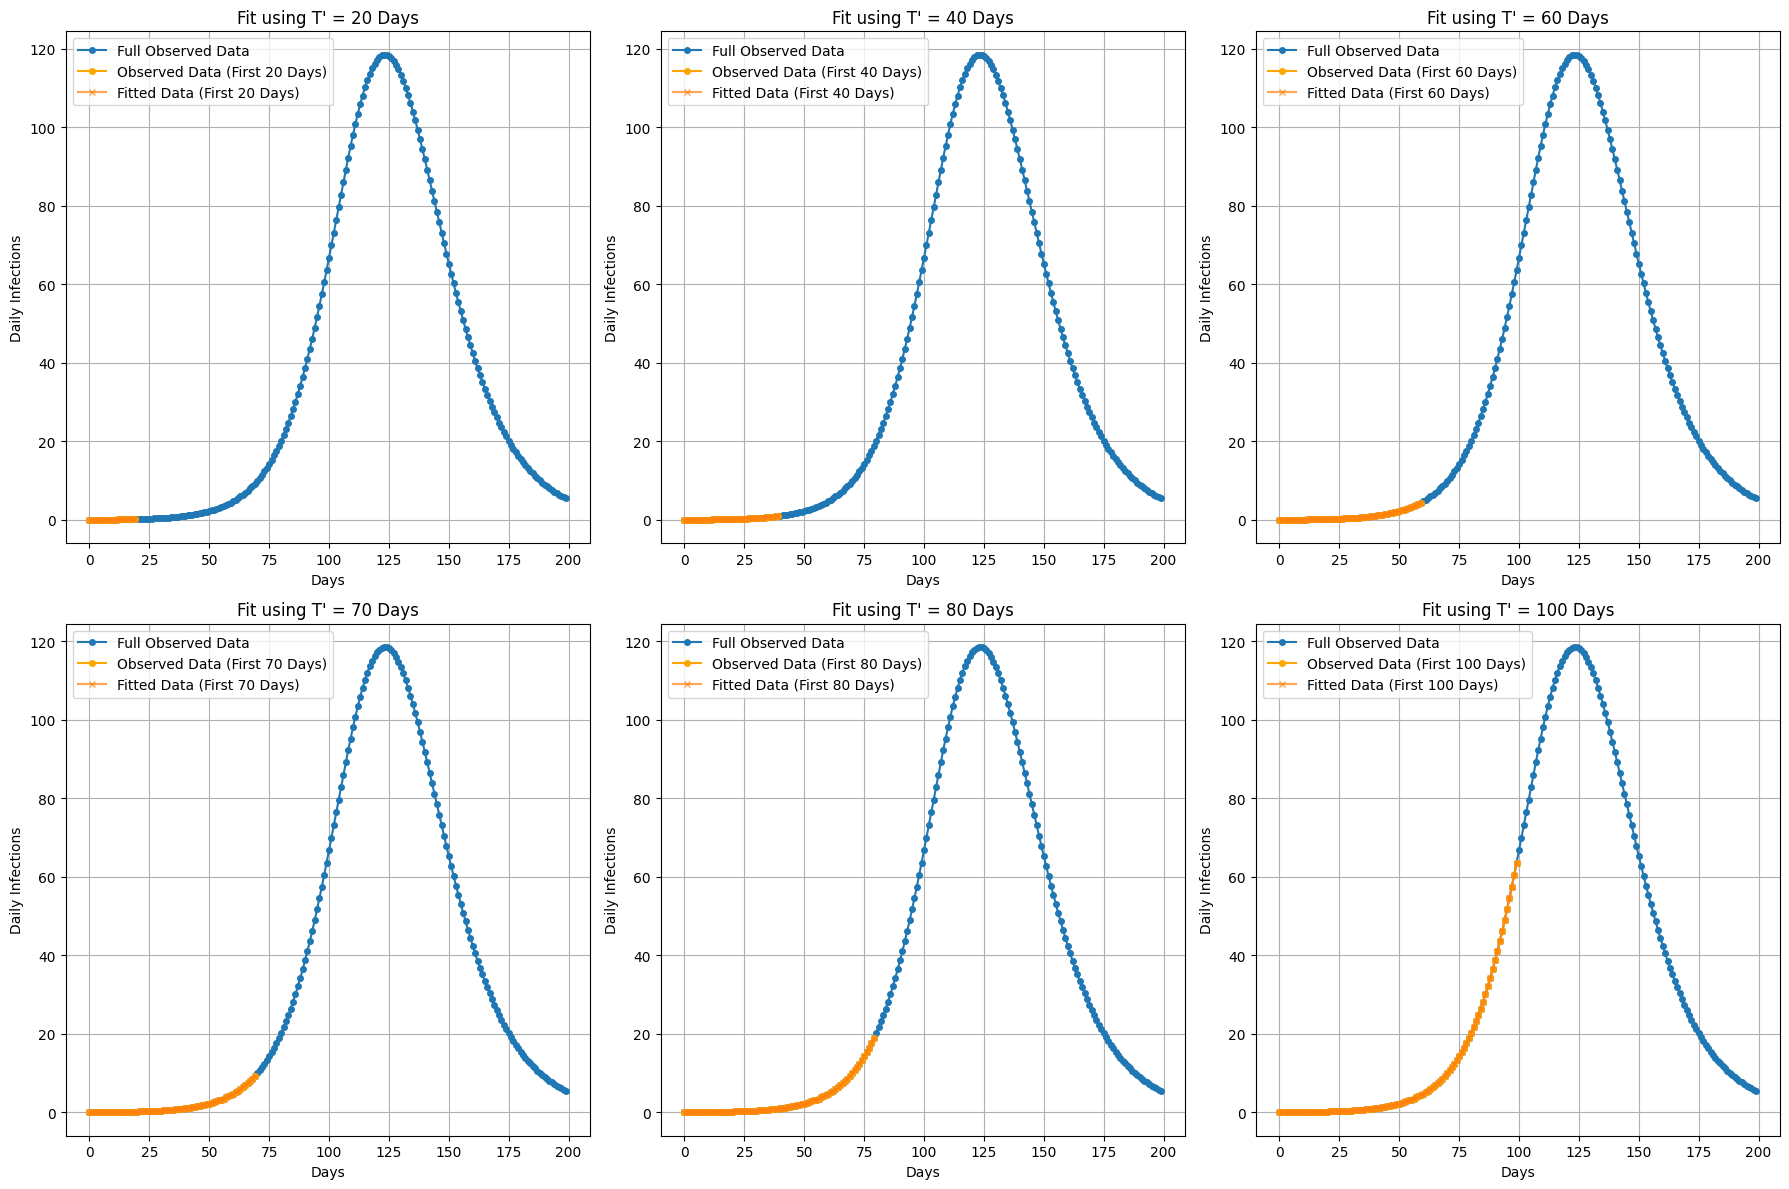

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Parameters (known)
beta = 0.1
gamma = 0.14
delta_E = 0.01
delta_I = 0.01
delta_H = 0.01
delta_H = 0.01

# Total population size
N = 10000

# Initial conditions
S0 = N-1
E0 = 1
I0 = 0
H0 = 0
R0 = 0

# Time steps
T = 200

# Known alpha for generating the data
alpha_true = 0.13

# Generate the synthetic data
def generate_data(alpha, beta, gamma, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T):
    S = np.zeros(T)
    E = np.zeros(T)
    I = np.zeros(T)
    H = np.zeros(T)
    R = np.zeros(T)
    daily_infections = np.zeros(T)

    S[0], E[0], I[0], H[0], R[0] = S0, E0, I0, H0, R0

    for t in range(1, T):
        S[t] = S[t-1] - ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1]
        E[t] = E[t-1] + ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1] - (beta + delta_E) * E[t-1]
        I[t] = I[t-1] + beta * E[t-1] - gamma * I[t-1]
        H[t] = H[t-1] + gamma * I[t-1] - delta_H * H[t-1]
        R[t] = R[t-1] + delta_E * E[t-1] + delta_I * I[t-1] + delta_H * H[t-1]
        daily_infections[t] = gamma * I[t]

    return daily_infections

# Generate the synthetic observations
observed_daily_infections = generate_data(alpha_true, beta, gamma, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T)

# Objective function to minimize (squared difference)
def objective(alpha, beta, gamma, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data):
    simulated_data = generate_data(alpha, beta, gamma, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime)
    return np.sum((simulated_data[:T_prime] - observed_data[:T_prime]) ** 2)

# Visualization function with multiple subplots
def plot_results_multisubplot(full_observed_data, T_prime_list, T, point_size=6):
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))
    axs = axs.flatten()

    for i, T_prime in enumerate(T_prime_list):
        # Fit alpha using only T' days of data
        result = minimize(objective, alpha_guess, args=(beta, gamma, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, full_observed_data))
        alpha_fitted = result.x[0]

        # Generate the fitted data with the estimated alpha for T_prime
        fitted_daily_infections = generate_data(alpha_fitted, beta, gamma, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime)

        # Plotting the results for T_prime
        days_full = np.arange(T)
        days_prime = np.arange(T_prime)

        axs[i].plot(days_full, full_observed_data, 'o-', label='Full Observed Data', markersize=point_size)
        axs[i].plot(days_prime, full_observed_data[:T_prime], 'o-', label=f'Observed Data (First {T_prime} Days)', markersize=point_size, color='orange')
        axs[i].plot(days_prime, fitted_daily_infections[:T_prime], 'x-', label=f'Fitted Data (First {T_prime} Days)', markersize=point_size, alpha=0.7)

        axs[i].set_xlabel('Days')
        axs[i].set_ylabel('Daily Infections')
        axs[i].set_title(f'Fit using T\' = {T_prime} Days')
        axs[i].legend()
        axs[i].grid(True)

    plt.tight_layout()
    plt.show()

# Initial guess for alpha
alpha_guess = 0.1

# Generate the synthetic observations for full dataset
observed_daily_infections = generate_data(alpha_true, beta, gamma, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T)

# Specify the new number of days T'
T_prime_list = [20, 40, 60, 70, 80, 100]

# Fit alpha using only T' days of data
result = minimize(objective, alpha_guess, args=(beta, gamma, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_daily_infections))

# Extract the fitted alpha
alpha_fitted = result.x[0]

# Generate the fitted data with the estimated alpha for T'
fitted_daily_infections = generate_data(alpha_fitted, beta, gamma, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime)

# Print the results
print(f"True alpha: {alpha_true}")
print(f"Fitted alpha using T'={T_prime} days: {alpha_fitted}")

# Plot the observed vs fitted results using T' days
plot_results_multisubplot(observed_daily_infections, T_prime_list, T, point_size=4)

##不同噪声的原始代码，单个参数的搜索

<ipython-input-70-d8111e4f3a5f>:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  S[t] = S[t-1] - ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1]
<ipython-input-70-d8111e4f3a5f>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  E[t] = E[t-1] + ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1] - (beta + delta_E) * E[t-1]


basinhopping step 0: f 0.323902
basinhopping step 1: f 0.323902 trial_f 0.323902 accepted 1  lowest_f 0.323902
basinhopping step 2: f 0.323902 trial_f 0.323902 accepted 1  lowest_f 0.323902
basinhopping step 3: f 0.323902 trial_f 0.323902 accepted 1  lowest_f 0.323902
basinhopping step 4: f 0.323902 trial_f 0.323902 accepted 1  lowest_f 0.323902
basinhopping step 5: f 0.323902 trial_f 0.323902 accepted 1  lowest_f 0.323902
basinhopping step 6: f 0.323902 trial_f 0.323902 accepted 1  lowest_f 0.323902
basinhopping step 7: f 0.323902 trial_f 0.323902 accepted 1  lowest_f 0.323902
basinhopping step 8: f 0.323902 trial_f 0.323902 accepted 1  lowest_f 0.323902
basinhopping step 9: f 0.323902 trial_f 0.323902 accepted 1  lowest_f 0.323902
basinhopping step 10: f 0.323902 trial_f 0.323902 accepted 1  lowest_f 0.323902
basinhopping step 11: f 0.323902 trial_f 0.323902 accepted 1  lowest_f 0.323902
basinhopping step 12: f 0.323902 trial_f 0.323902 accepted 1  lowest_f 0.323902
basinhopping step

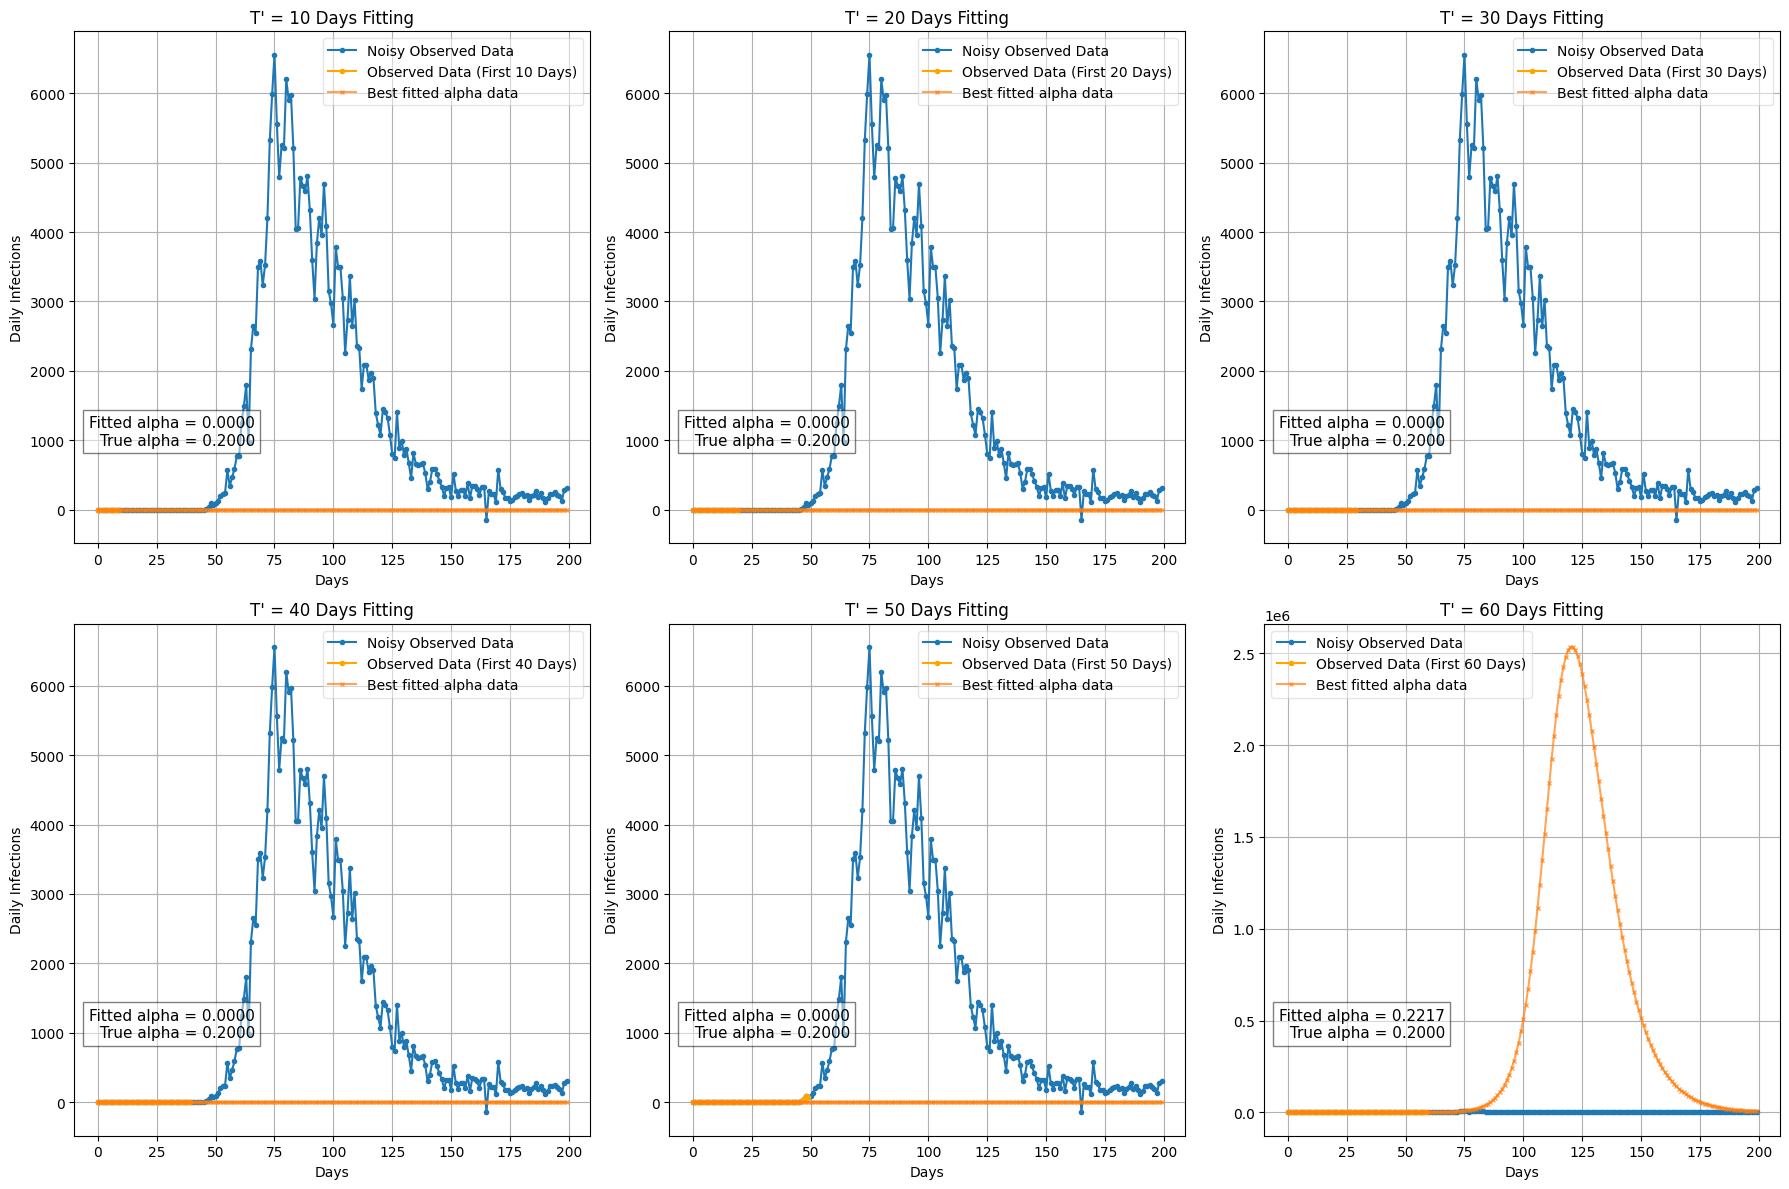

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 设置随机数种子以确保每次实验生成相同的数据
np.random.seed(42)

# 已知的参数
beta = 0.1
gamma = 0.14
delta_E = 0.01
delta_I = 0.01
delta_H = 0.01

# 总人口数量
N = 10000

# 初始条件
S0 = N-1
E0 = 1
I0 = 0
H0 = 0
R0 = 0

# 生成完整数据集的天数
T = 200

# 用于生成数据的已知 alpha
alpha_true = 0.20

# 生成合成数据的函数
def generate_data(alpha, beta, gamma, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T):
    S = np.zeros(T)
    E = np.zeros(T)
    I = np.zeros(T)
    H = np.zeros(T)
    R = np.zeros(T)
    daily_infections = np.zeros(T)

    S[0], E[0], I[0], H[0], R[0] = S0, E0, I0, H0, R0

    for t in range(1, T):
        S[t] = S[t-1] - ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1]
        E[t] = E[t-1] + ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1] - (beta + delta_E) * E[t-1]
        I[t] = I[t-1] + beta * E[t-1] - gamma * I[t-1]
        H[t] = H[t-1] + gamma * I[t-1] - delta_H * H[t-1]
        R[t] = R[t-1] + delta_E * E[t-1] + delta_I * I[t-1] + delta_H * H[t-1]
        daily_infections[t] = gamma * I[t]

    return daily_infections

# 向数据添加噪声的函数（p为0或1的二项分布）
def add_custom_noise(data, p_prob=0.1, a=1):
    # 生成 p 为 0 或 1 的二项分布
    p_values = np.random.binomial(1, p_prob, size=data.shape)

    # 生成 u(-1,1) 的均匀噪声
    uniform_noise = np.random.uniform(-1, 1, size=data.shape)

    # 生成 N(0, 0.1) 的高斯噪声
    gaussian_noise = np.random.normal(0, 0.2, size=data.shape)

    # 计算 epsilon = p * a * u(-1,1) + N(0,0.1)
    epsilon = p_values * a * uniform_noise + gaussian_noise

    # 生成带噪声的观测数据 Y = y * (1 + epsilon)
    noisy_data = data * (1 + epsilon)

    # 确保噪声后数据为非负数
    noisy_data[noisy_data < 0] = 0

    return noisy_data

# 使用L1范数（绝对值差异）作为目标函数
def objective(alpha, beta, gamma, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data):
    simulated_data = generate_data(alpha, beta, gamma, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime)
    return np.sum(np.abs(simulated_data[:T_prime] - observed_data[:T_prime]))

# Visualization function with multiple subplots
def plot_results_multisubplot(full_observed_data, T_prime_list, T, point_size=6):
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))
    axs = axs.flatten()

    for i, T_prime in enumerate(T_prime_list):
        # Fit alpha using only T' days of data
        result = minimize(objective, alpha_guess, args=(beta, gamma, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, full_observed_data))
        alpha_fitted = result.x[0]

        # Generate the fitted data with the estimated alpha for T_prime
        fitted_daily_infections = generate_data(alpha_fitted, beta, gamma, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T)

        # Plotting the results for T_prime
        days_full = np.arange(T)
        days_prime = np.arange(T_prime)

        # Plot full observed data and the part used for fitting
        axs[i].plot(days_full, full_observed_data, 'o-', label='Noisy Observed Data', markersize=point_size)
        axs[i].plot(days_prime, full_observed_data[:T_prime], 'o-', label=f'Observed Data (First {T_prime} Days)', markersize=point_size, color='orange')

        # Plot the fitted data for T' and beyond
        axs[i].plot(days_full, fitted_daily_infections, 'x-', label=f'Best fitted alpha data', markersize=point_size, alpha=0.7)

        # Annotate the fitted alpha value
        axs[i].text(0.35, 0.25, f'Fitted alpha = {alpha_fitted:.4f}\n True alpha = {alpha_true:.4f}', transform=axs[i].transAxes, fontsize=11,
                    verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))
        axs[i].set_xlabel('Days')
        axs[i].set_ylabel('Daily Infections')
        axs[i].set_title(f'T\' = {T_prime} Days Fitting')
        axs[i].legend(framealpha = 0.5)
        axs[i].grid(True)

    plt.tight_layout()
    plt.show()

# 初始的 alpha 猜测值
alpha_guess = 0.05

# 生成完整数据集的合成观测数据
observed_daily_infections = generate_data(alpha_true, beta, gamma, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T)

# 向生成的数据添加自定义噪声
observed_daily_infections_noisy = add_custom_noise(observed_daily_infections, p_prob=0.1, a=0.5)

# 指定每个子图的不同 T' 天数
T_prime_list = [20, 30, 40, 50, 60, 70]  # 根据需要修改这些值

# 使用带噪声的数据绘制多子图
plot_results_multisubplot(observed_daily_infections_noisy, T_prime_list, T, point_size=3)


##多次重启的，带有噪声的单参数拟合,感觉不是很靠谱

<ipython-input-28-4baf40d254f3>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  S[t] = S[t-1] - ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1]
<ipython-input-28-4baf40d254f3>:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  E[t] = E[t-1] + ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1] - (beta + delta_E) * E[t-1]
<ipython-input-28-4baf40d254f3>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  S[t] = S[t-1] - ((alpha * E[t-1] / N) + (alpha * I[t-

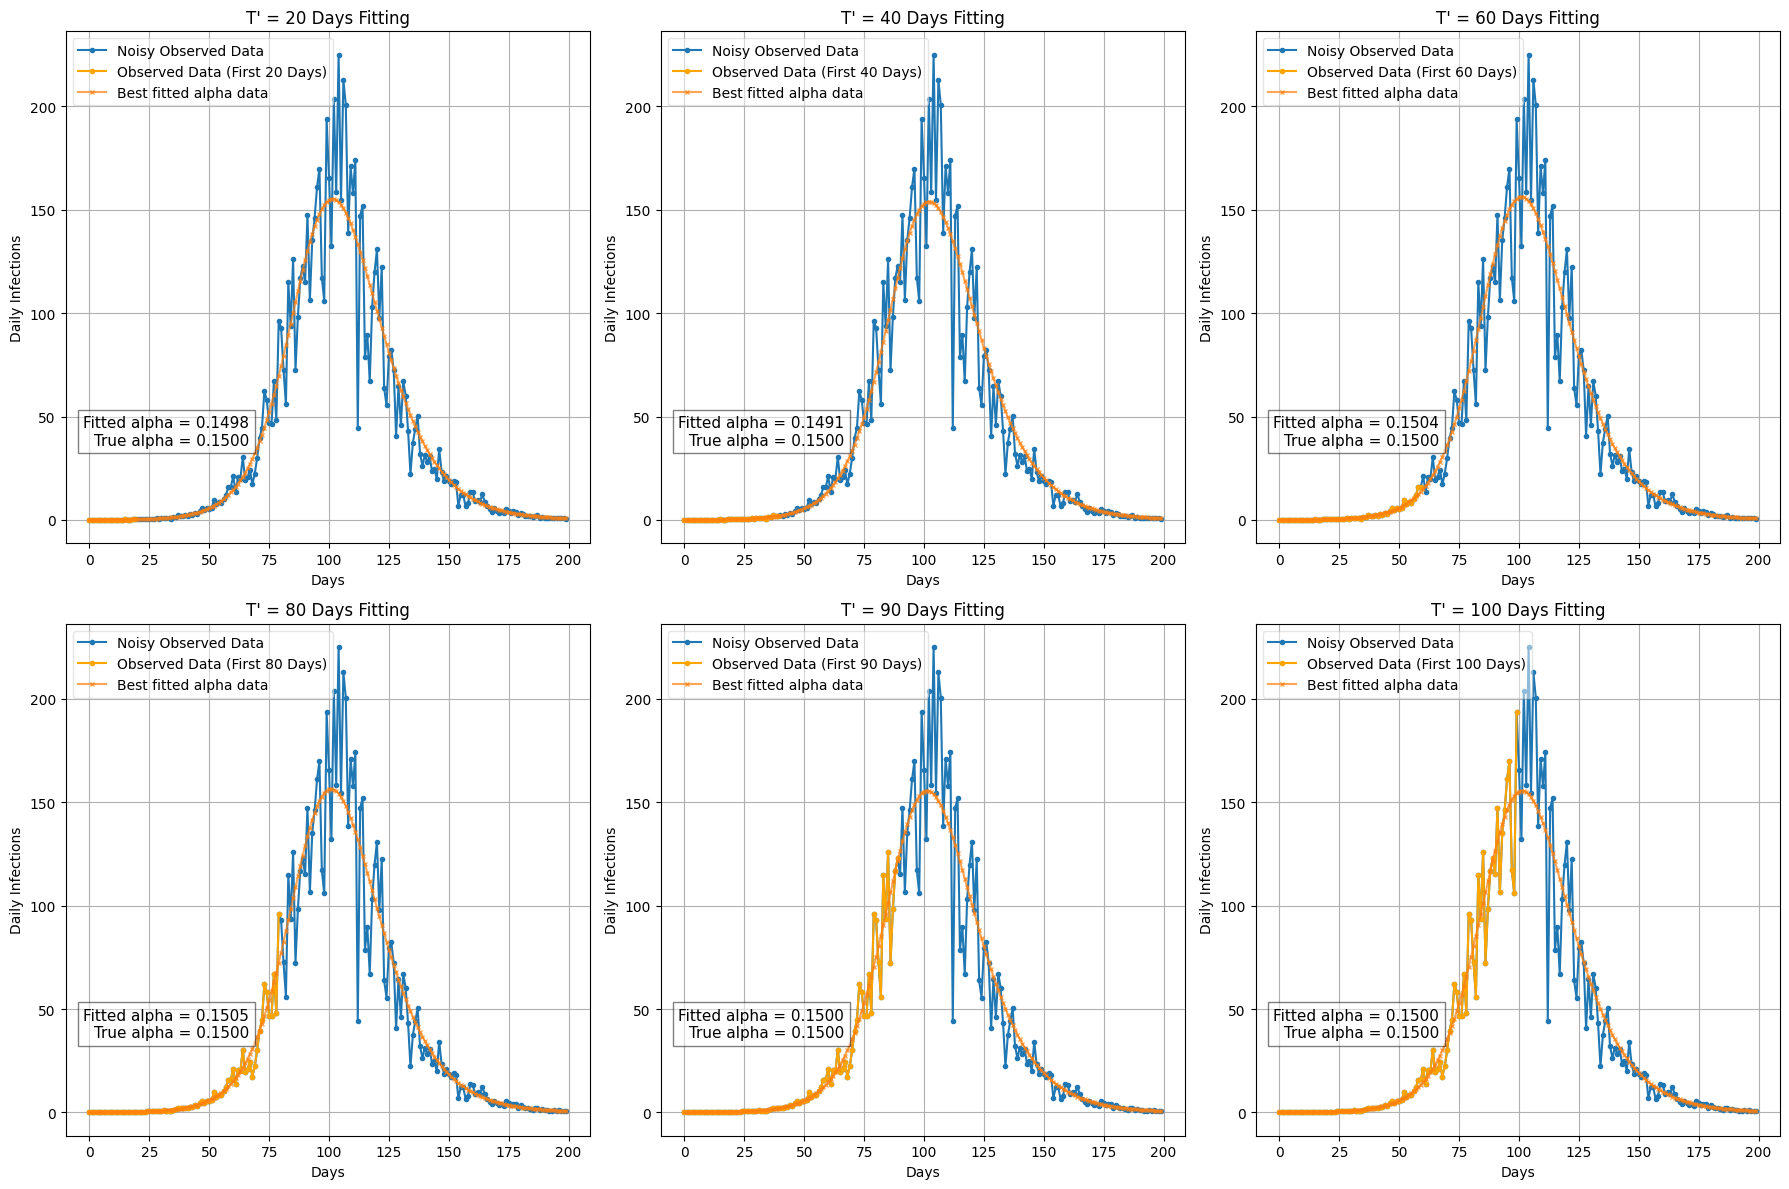

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 设置随机数种子以确保每次实验生成相同的数据
np.random.seed(42)

# 已知的参数
beta = 0.1
gamma = 0.14
delta_E = 0.01
delta_I = 0.01
delta_H = 0.01

# 总人口数量
N = 10000

# 初始条件
S0 = N-1
E0 = 1
I0 = 0
H0 = 0
R0 = 0

# 生成完整数据集的天数
T = 200

# 用于生成数据的已知 alpha
alpha_true = 0.15

# 生成合成数据的函数
def generate_data(alpha, beta, gamma, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T):
    S = np.zeros(T)
    E = np.zeros(T)
    I = np.zeros(T)
    H = np.zeros(T)
    R = np.zeros(T)
    daily_infections = np.zeros(T)

    S[0], E[0], I[0], H[0], R[0] = S0, E0, I0, H0, R0

    for t in range(1, T):
        S[t] = S[t-1] - ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1]
        E[t] = E[t-1] + ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1] - (beta + delta_E) * E[t-1]
        I[t] = I[t-1] + beta * E[t-1] - gamma * I[t-1]
        H[t] = H[t-1] + gamma * I[t-1] - delta_H * H[t-1]
        R[t] = R[t-1] + delta_E * E[t-1] + delta_I * I[t-1] + delta_H * H[t-1]
        daily_infections[t] = gamma * I[t]

    return daily_infections

# 向数据添加噪声的函数（p为0或1的二项分布）
def add_custom_noise(data, p_prob=0.1, a=1):
    # 生成 p 为 0 或 1 的二项分布
    p_values = np.random.binomial(1, p_prob, size=data.shape)

    # 生成 u(-1,1) 的均匀噪声
    uniform_noise = np.random.uniform(-1, 1, size=data.shape)

    # 生成 N(0, 0.1) 的高斯噪声
    gaussian_noise = np.random.normal(0, 0.2, size=data.shape)

    # 计算 epsilon = p * a * u(-1,1) + N(0,0.1)
    epsilon = p_values * a * uniform_noise + gaussian_noise

    # 生成带噪声的观测数据 Y = y * (1 + epsilon)
    noisy_data = data * (1 + epsilon)

    # 确保噪声后数据为非负数
    noisy_data[noisy_data < 0] = 0

    return noisy_data

# 使用L1范数（绝对值差异）作为目标函数，用噪声数据进行拟合
def objective(alpha, beta, gamma, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data):
    simulated_data = generate_data(alpha, beta, gamma, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime)
    return np.sum(np.abs(simulated_data[:T_prime] - observed_data[:T_prime]))

# 执行多次随机重启的优化过程
def random_restart_optimization(restarts, beta, gamma, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data):
    best_result = None
    best_alpha = None
    best_loss = float('inf')

    for i in range(restarts):
        # 生成一个随机的初始 alpha 猜测值
        alpha_guess = np.random.uniform(0, 1)

        # 执行优化
        result = minimize(objective, alpha_guess, args=(beta, gamma, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data))

        # 如果找到更好的结果，则保存它
        if result.fun < best_loss:
            best_loss = result.fun
            best_result = result
            best_alpha = result.x[0]

    return best_alpha, best_result

# Visualization function with multiple subplots
def plot_results_multisubplot(full_observed_data, T_prime_list, T, restarts, point_size=6):
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))
    axs = axs.flatten()

    for i, T_prime in enumerate(T_prime_list):
        # 使用随机重启进行优化
        alpha_fitted, _ = random_restart_optimization(restarts, beta, gamma, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, full_observed_data)

        # 生成使用估计 alpha 的拟合数据
        fitted_daily_infections = generate_data(alpha_fitted, beta, gamma, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T)

        # 绘制 T_prime 的结果
        days_full = np.arange(T)
        days_prime = np.arange(T_prime)

        # 绘制完整的观测数据和用于拟合的部分
        axs[i].plot(days_full, full_observed_data, 'o-', label='Noisy Observed Data', markersize=point_size)
        axs[i].plot(days_prime, full_observed_data[:T_prime], 'o-', label=f'Observed Data (First {T_prime} Days)', markersize=point_size, color='orange')

        # 绘制 T' 及其后的拟合数据
        axs[i].plot(days_full, fitted_daily_infections, 'x-', label=f'Best fitted alpha data', markersize=point_size, alpha=0.7)

        # 注释拟合的 alpha 值
        axs[i].text(0.35, 0.25, f'Fitted alpha = {alpha_fitted:.4f}\n True alpha = {alpha_true:.4f}', transform=axs[i].transAxes, fontsize=11,
                    verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))
        axs[i].set_xlabel('Days')
        axs[i].set_ylabel('Daily Infections')
        axs[i].set_title(f'T\' = {T_prime} Days Fitting')
        axs[i].legend(framealpha = 0.5)
        axs[i].grid(True)

    plt.tight_layout()
    plt.show()

# 生成完整数据集的合成观测数据
observed_daily_infections = generate_data(alpha_true, beta, gamma, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T)

# 向生成的数据添加自定义噪声
observed_daily_infections_noisy = add_custom_noise(observed_daily_infections, p_prob=0.1, a=0.5)

# 指定每个子图的不同 T' 天数
T_prime_list = [20, 40, 60, 80, 90, 100]  # 根据需要修改这些值

# 使用带噪声的数据绘制多子图，设置随机重启次数
restarts = 10  # 设置重启次数，例如 10 次
plot_results_multisubplot(observed_daily_infections_noisy, T_prime_list, T, restarts, point_size=3)


##逐一搜索，存在局部最优解，收敛时间较长，需要多次迭代来得到结果

<ipython-input-66-95117275e851>:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  I[t] = I[t-1] + beta * E[t-1] - gamma * I[t-1]
<ipython-input-66-95117275e851>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  H[t] = H[t-1] + gamma * I[t-1] - delta_H * H[t-1]
<ipython-input-66-95117275e851>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  daily_infections[t] = gamma * I[t]
<ipython-input-66-95117275e851>:40: DeprecationWarning: Conversion of an array with ndim > 

Converged after 3 iterations.
Reverse check converged after 1 iterations.
Converged after 15 iterations.
Reverse check converged after 1 iterations.
Converged after 8 iterations.
Reverse check converged after 1 iterations.
Converged after 3 iterations.
Reverse check converged after 1 iterations.
Converged after 3 iterations.
Reverse check converged after 1 iterations.
Converged after 14 iterations.
Reverse check converged after 1 iterations.


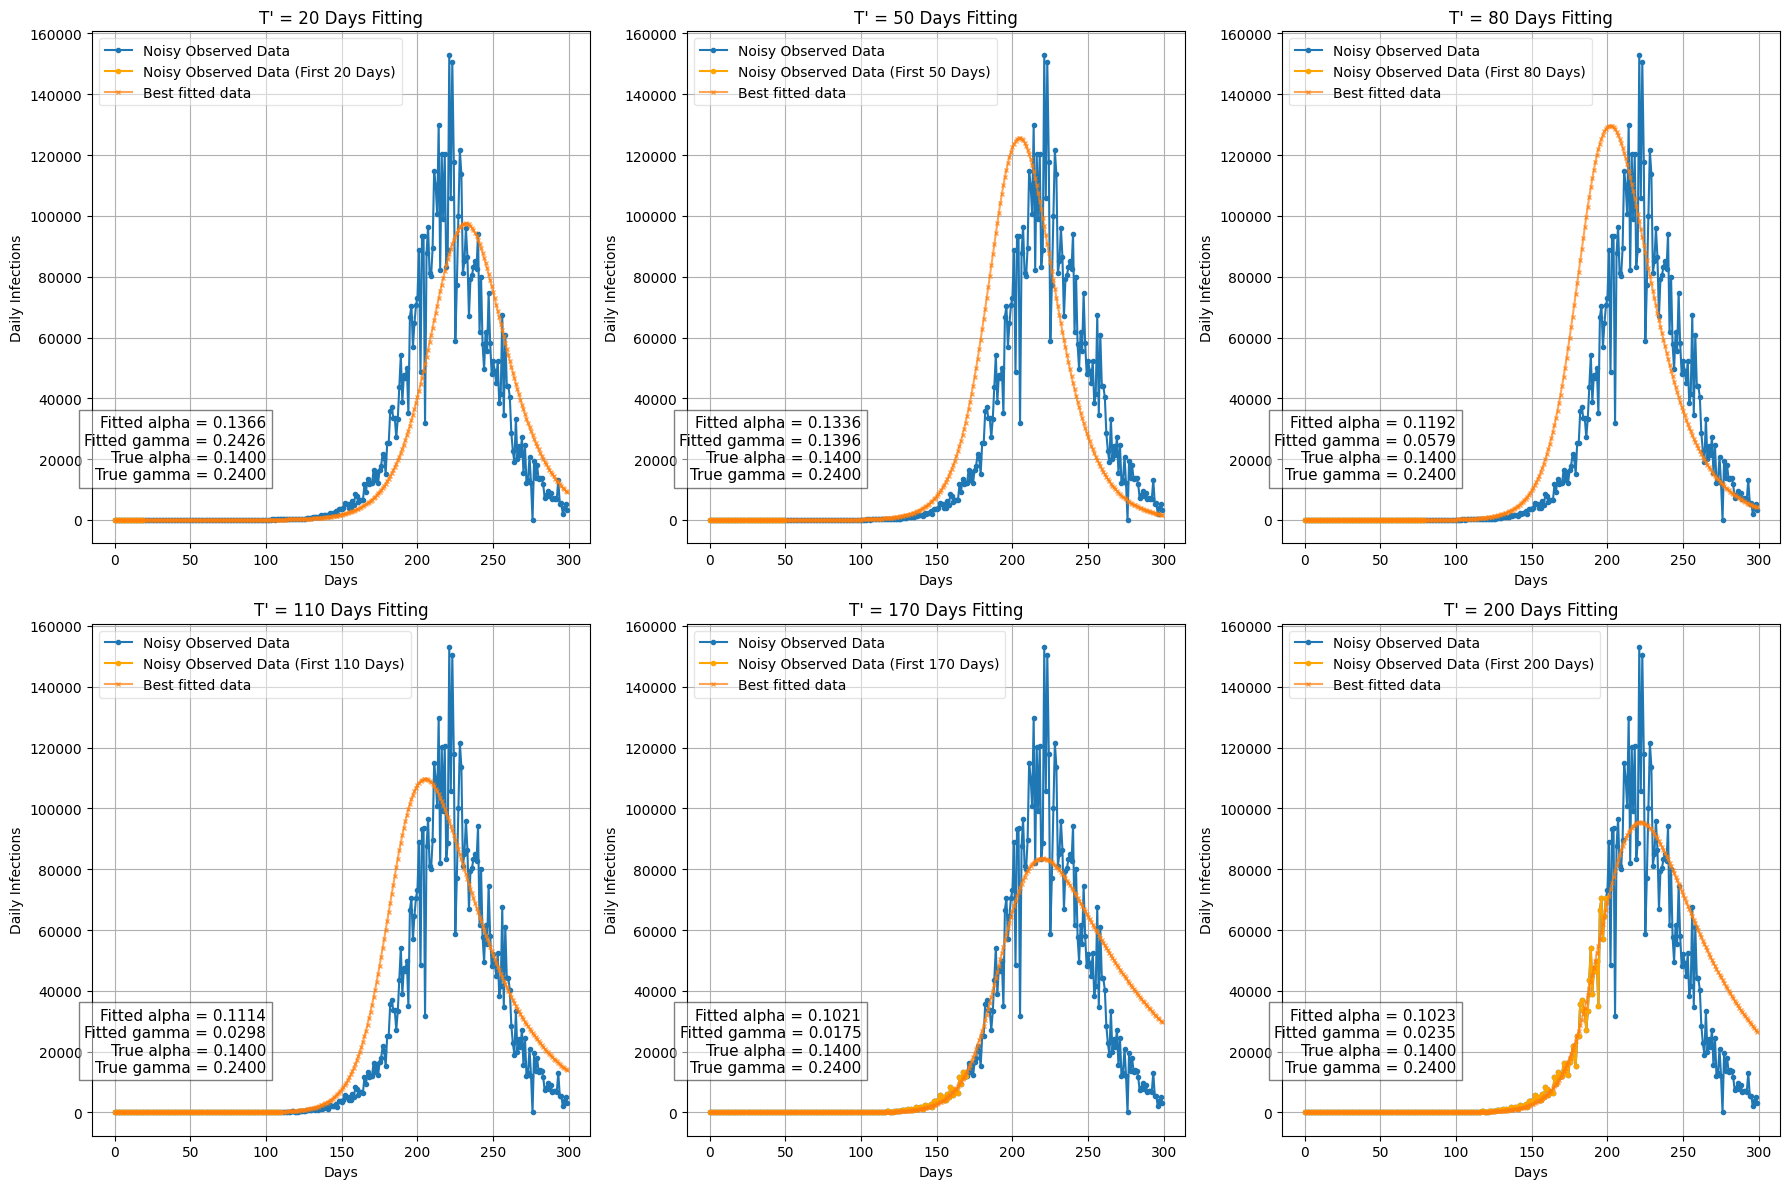

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 已知的参数
beta = 0.1
delta_E = 0.01
delta_I = 0.01
delta_H = 0.01

# 总人口数量
N = 1e7

# 初始条件
S0 = N-1
E0 = 1
I0 = 0
H0 = 0
R0 = 0

# 生成完整数据集的天数
T = 300

# 用于生成数据的已知 alpha 和 gamma
alpha_true = 0.14
gamma_true = 0.24

# 生成合成数据的函数
def generate_data(alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T):
    S = np.zeros(T)
    E = np.zeros(T)
    I = np.zeros(T)
    H = np.zeros(T)
    R = np.zeros(T)
    daily_infections = np.zeros(T)

    S[0], E[0], I[0], H[0], R[0] = S0, E0, I0, H0, R0

    for t in range(1, T):
        S[t] = S[t-1] - ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1]
        E[t] = E[t-1] + ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1] - (beta + delta_E) * E[t-1]
        I[t] = I[t-1] + beta * E[t-1] - gamma * I[t-1]
        H[t] = H[t-1] + gamma * I[t-1] - delta_H * H[t-1]
        R[t] = R[t-1] + delta_E * E[t-1] + delta_I * I[t-1] + delta_H * H[t-1]
        daily_infections[t] = gamma * I[t]

    return daily_infections

# 替换加噪声函数，使用 epsilon 替代 alpha
def add_custom_noise(data, p=0.1, a=1, gaussian_std=0.1):
    # 生成 p 为 0 或 1 的二项分布
    p_values = np.random.binomial(1, p, size=data.shape)

    # 生成 u(-1,1) 的均匀噪声
    uniform_noise = np.random.uniform(-1, 1, size=data.shape)

    # 生成 N(0, gaussian_std) 的高斯噪声
    gaussian_noise = np.random.normal(0, gaussian_std, size=data.shape)

    # 计算 epsilon = p * a * u(-1,1) + N(0, gaussian_std)
    epsilon = p_values * a * uniform_noise + gaussian_noise

    # 生成带噪声的观测数据 Y = y * (1 + epsilon)
    noisy_data = data * (1 + epsilon)

    # 确保噪声后数据为非负数
    noisy_data[noisy_data < 0] = 0

    return noisy_data

# 使用L1范数（绝对值差异）作为目标函数
def objective(params, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data):
    alpha, gamma = params
    simulated_data = generate_data(alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime)
    return np.sum(np.abs(simulated_data[:T_prime] - observed_data[:T_prime]))

# # 初始的 alpha 和 gamma 猜测值
# initial_guess = [0.05, 0.05]

# 逐步拟合函数
def iterative_fitting(objective, initial_alpha, initial_gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data, tol=1e-4, max_iter=100):
    alpha = initial_alpha
    gamma = initial_gamma

    for iteration in range(max_iter):
        # Step 1: 固定 alpha，拟合 gamma
        result_gamma = minimize(lambda gamma: objective([alpha, gamma], beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data),
                                x0=gamma, bounds=[(0.0, 1.0)])
        new_gamma = result_gamma.x[0]

        # Step 2: 固定 gamma，拟合 alpha
        result_alpha = minimize(lambda alpha: objective([alpha, new_gamma], beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data),
                                x0=alpha, bounds=[(0.0, 1.0)])
        new_alpha = result_alpha.x[0]

        # 检查收敛性
        if abs(new_alpha - alpha) < tol and abs(new_gamma - gamma) < tol:
            print(f"Converged after {iteration + 1} iterations.")
            break

        alpha, gamma = new_alpha, new_gamma

    return alpha, gamma

# 反向检查函数
def reverse_check(objective, alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data, tol=1e-4, max_iter=10):
    for iteration in range(max_iter):
        # 固定 gamma，拟合 alpha
        result_alpha = minimize(lambda alpha: objective([alpha, gamma], beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data),
                                x0=alpha, bounds=[(0.0, 1.0)])
        new_alpha = result_alpha.x[0]

        # 固定 alpha，拟合 gamma
        result_gamma = minimize(lambda gamma: objective([new_alpha, gamma], beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data),
                                x0=gamma, bounds=[(0.0, 1.0)])
        new_gamma = result_gamma.x[0]

        # 检查两次结果的差异
        if abs(new_alpha - alpha) < tol and abs(new_gamma - gamma) < tol:
            print(f"Reverse check converged after {iteration + 1} iterations.")
            break

        alpha, gamma = new_alpha, new_gamma

    return alpha, gamma


# 生成完整数据集的合成观测数据
observed_daily_infections = generate_data(alpha_true, gamma_true, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T)

# 向生成的数据添加自定义噪声
observed_daily_infections_noisy = add_custom_noise(observed_daily_infections, p=0.1, a=1, gaussian_std=0.2)

# 直接同时拟合 alpha 和 gamma
T_prime_list = [20, 50, 80, 110, 170, 200]  # 根据需要修改这些值

# 应用逐步拟合和反向检查
def fit_with_iterative_method(full_observed_data, T_prime_list, T, initial_alpha, initial_gamma, point_size=6):
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))
    axs = axs.flatten()

    for i, T_prime in enumerate(T_prime_list):
        # 初始拟合
        alpha, gamma = iterative_fitting(objective, initial_alpha, initial_gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, full_observed_data)

        # 反向检查
        alpha, gamma = reverse_check(objective, alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, full_observed_data)

        # 生成使用估计 alpha 和 gamma 的拟合数据
        fitted_daily_infections = generate_data(alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T)

        # 绘制 T_prime 的结果
        days_full = np.arange(T)
        days_prime = np.arange(T_prime)

        # 绘制完整的观测数据和用于拟合的部分
        axs[i].plot(days_full, full_observed_data, 'o-', label='Noisy Observed Data', markersize=point_size)
        axs[i].plot(days_prime, full_observed_data[:T_prime], 'o-', label=f'Noisy Observed Data (First {T_prime} Days)', markersize=point_size, color='orange')

        # 绘制 T' 及其后的拟合数据
        axs[i].plot(days_full, fitted_daily_infections, 'x-', label=f'Best fitted data', markersize=point_size, alpha=0.7)

        # 注释拟合的 alpha 和 gamma 值
        axs[i].text(0.35, 0.25, f'Fitted alpha = {alpha:.4f}\nFitted gamma = {gamma:.4f}\nTrue alpha = {alpha_true:.4f}\nTrue gamma = {gamma_true:.4f}',
                    transform=axs[i].transAxes, fontsize=11, verticalalignment='top', horizontalalignment='right',
                    bbox=dict(facecolor='white', alpha=0.5))
        axs[i].set_xlabel('Days')
        axs[i].set_ylabel('Daily Infections')
        axs[i].set_title(f'T\' = {T_prime} Days Fitting')
        axs[i].legend(framealpha = 0.5)
        axs[i].grid(True)

    plt.tight_layout()
    plt.show()

# 使用逐步拟合方法绘制多子图
initial_alpha = 0.1
initial_gamma = 0.1
fit_with_iterative_method(observed_daily_infections_noisy, T_prime_list, T, initial_alpha, initial_gamma, point_size=3)

##真实数据的单参数搜索

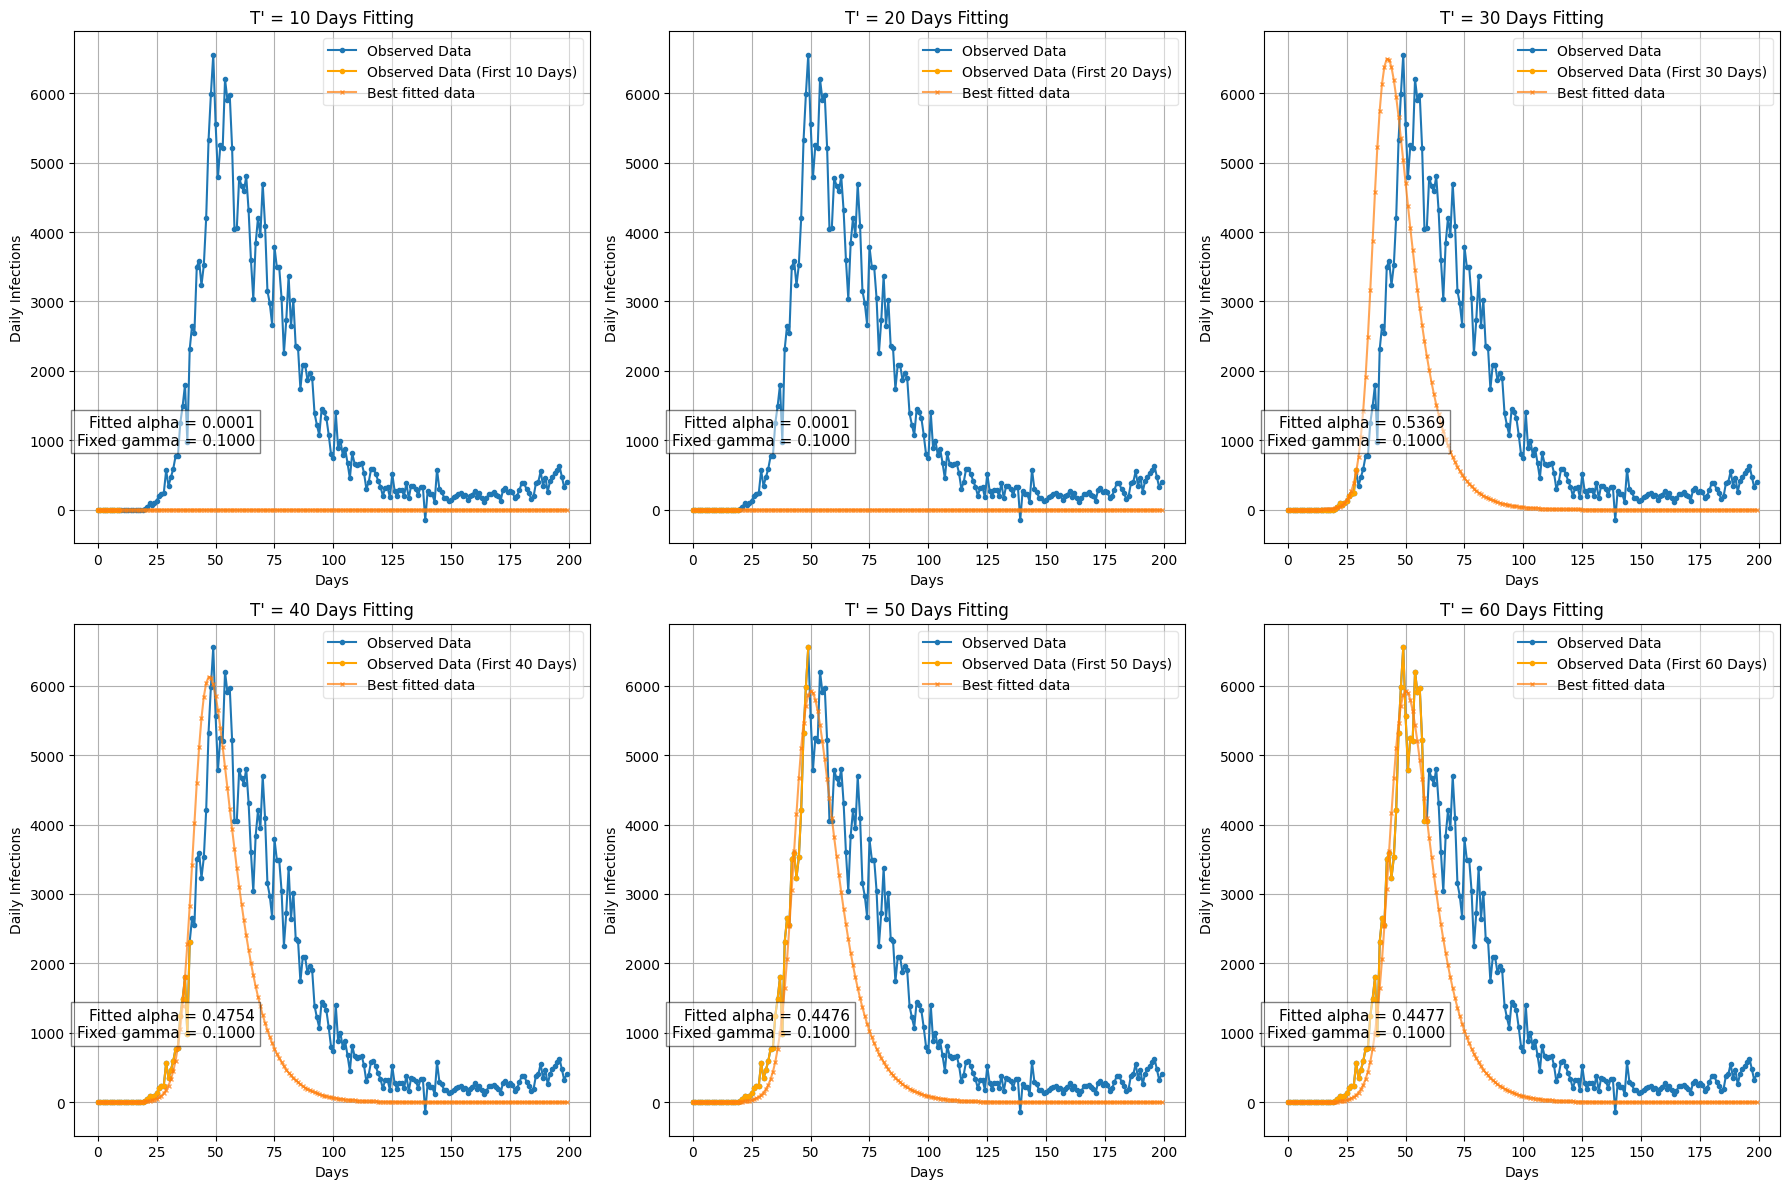

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 已知的参数
beta = 0.1
delta_E = 0.1
delta_I = 0.1
delta_H = 0.1

# 总人口数量
N = 59037472/200

# 初始条件
S0 = N-1
E0 = 1
I0 = 0
H0 = 0
R0 = 0

# 生成完整数据集的天数
T = 200

# 固定的 gamma 值
gamma_fixed = .1


# 生成合成数据的函数
def generate_data(alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T):
    S = np.zeros(T)
    E = np.zeros(T)
    I = np.zeros(T)
    H = np.zeros(T)
    R = np.zeros(T)
    daily_infections = np.zeros(T)

    S[0], E[0], I[0], H[0], R[0] = S0, E0, I0, H0, R0

    for t in range(1, T):
        S[t] = S[t-1] - ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1]
        E[t] = E[t-1] + ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1] - (beta + delta_E) * E[t-1]
        I[t] = I[t-1] + beta * E[t-1] - gamma * I[t-1]
        H[t] = H[t-1] + gamma * I[t-1] - delta_H * H[t-1]
        R[t] = R[t-1] + delta_E * E[t-1] + delta_I * I[t-1] + delta_H * H[t-1]
        daily_infections[t] = gamma * I[t]

    return daily_infections

# 替换原来的噪声数据生成，改为使用CSV文件中的真实数据
def load_real_data(file_path, column_name, T):
    data = pd.read_csv(file_path)
    cumulative_data = data[column_name].values[:T+1]
    real_data = np.diff(cumulative_data)
    return real_data[:T]

# 使用L1范数（绝对值差异）作为目标函数，只针对 alpha 进行优化
def objective_alpha(alpha, gamma_fixed, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data):
    simulated_data = generate_data(alpha, gamma_fixed, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime)
    return np.sum(np.abs(simulated_data[:T_prime] - observed_data[:T_prime]))

# 从CSV文件中加载真实数据
file_path = 'cleaned_italy_data.csv'
observed_daily_infections_real = load_real_data(file_path, 'Confirmed', T)

# 直接同时拟合 alpha 和 gamma
T_prime_list = [10, 20, 30, 40, 50, 60]  # 根据需要修改这些值

# 进行随机搜索以拟合 alpha
def fit_alpha_random_search(full_observed_data, T_prime_list, T, alpha_range, n_samples, gamma_fixed, point_size=6):
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))
    axs = axs.flatten()

    for i, T_prime in enumerate(T_prime_list):
        best_alpha = None
        best_objective = float('inf')

        for _ in range(n_samples):
            # 从 alpha_range 中随机采样一个 alpha
            alpha = np.random.uniform(alpha_range[0], alpha_range[1])

            # 计算目标函数值
            objective_value = objective_alpha(alpha, gamma_fixed, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, full_observed_data)

            # 如果当前的目标函数值更小，更新最优解
            if objective_value < best_objective:
                best_objective = objective_value
                best_alpha = alpha

        # 生成使用最优 alpha 和固定 gamma 的拟合数据
        fitted_daily_infections = generate_data(best_alpha, gamma_fixed, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T)

        # 绘制 T_prime 的结果
        days_full = np.arange(T)
        days_prime = np.arange(T_prime)

        # 绘制完整的观测数据和用于拟合的部分
        axs[i].plot(days_full, full_observed_data, 'o-', label='Observed Data', markersize=point_size)
        axs[i].plot(days_prime, full_observed_data[:T_prime], 'o-', label=f'Observed Data (First {T_prime} Days)', markersize=point_size, color='orange')

        # 绘制 T' 及其后的拟合数据
        axs[i].plot(days_full, fitted_daily_infections, 'x-', label=f'Best fitted data', markersize=point_size, alpha=0.7)

        # 注释拟合的 alpha 值
        axs[i].text(0.35, 0.25, f'Fitted alpha = {best_alpha:.4f}\nFixed gamma = {gamma_fixed:.4f}',
                    transform=axs[i].transAxes, fontsize=11, verticalalignment='top', horizontalalignment='right',
                    bbox=dict(facecolor='white', alpha=0.5))
        axs[i].set_xlabel('Days')
        axs[i].set_ylabel('Daily Infections')
        axs[i].set_title(f'T\' = {T_prime} Days Fitting')
        axs[i].legend(framealpha=0.5)
        axs[i].grid(True)

    plt.tight_layout()
    plt.show()

# 使用随机搜索进行 alpha 的拟合
alpha_range = (0.0, 1,0)  # alpha 的搜索范围
n_samples = 10000  # 随机搜索的样本数量
fit_alpha_random_search(observed_daily_infections_real, T_prime_list, T, alpha_range, n_samples, gamma_fixed, point_size=3)


##真实数据的逐一搜索

<ipython-input-17-8a78d7358943>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  I[t] = I[t-1] + beta * E[t-1] - gamma * I[t-1]
<ipython-input-17-8a78d7358943>:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  H[t] = H[t-1] + gamma * I[t-1] - delta_H * H[t-1]
<ipython-input-17-8a78d7358943>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  daily_infections[t] = gamma * I[t]
<ipython-input-17-8a78d7358943>:41: DeprecationWarning: Conversion of an array with ndim > 

Converged after 2 iterations.
Reverse check converged after 1 iterations.
Converged after 2 iterations.
Reverse check converged after 1 iterations.
Converged after 2 iterations.
Reverse check converged after 1 iterations.
Converged after 2 iterations.
Reverse check converged after 1 iterations.
Converged after 2 iterations.
Reverse check converged after 1 iterations.
Converged after 2 iterations.
Reverse check converged after 1 iterations.


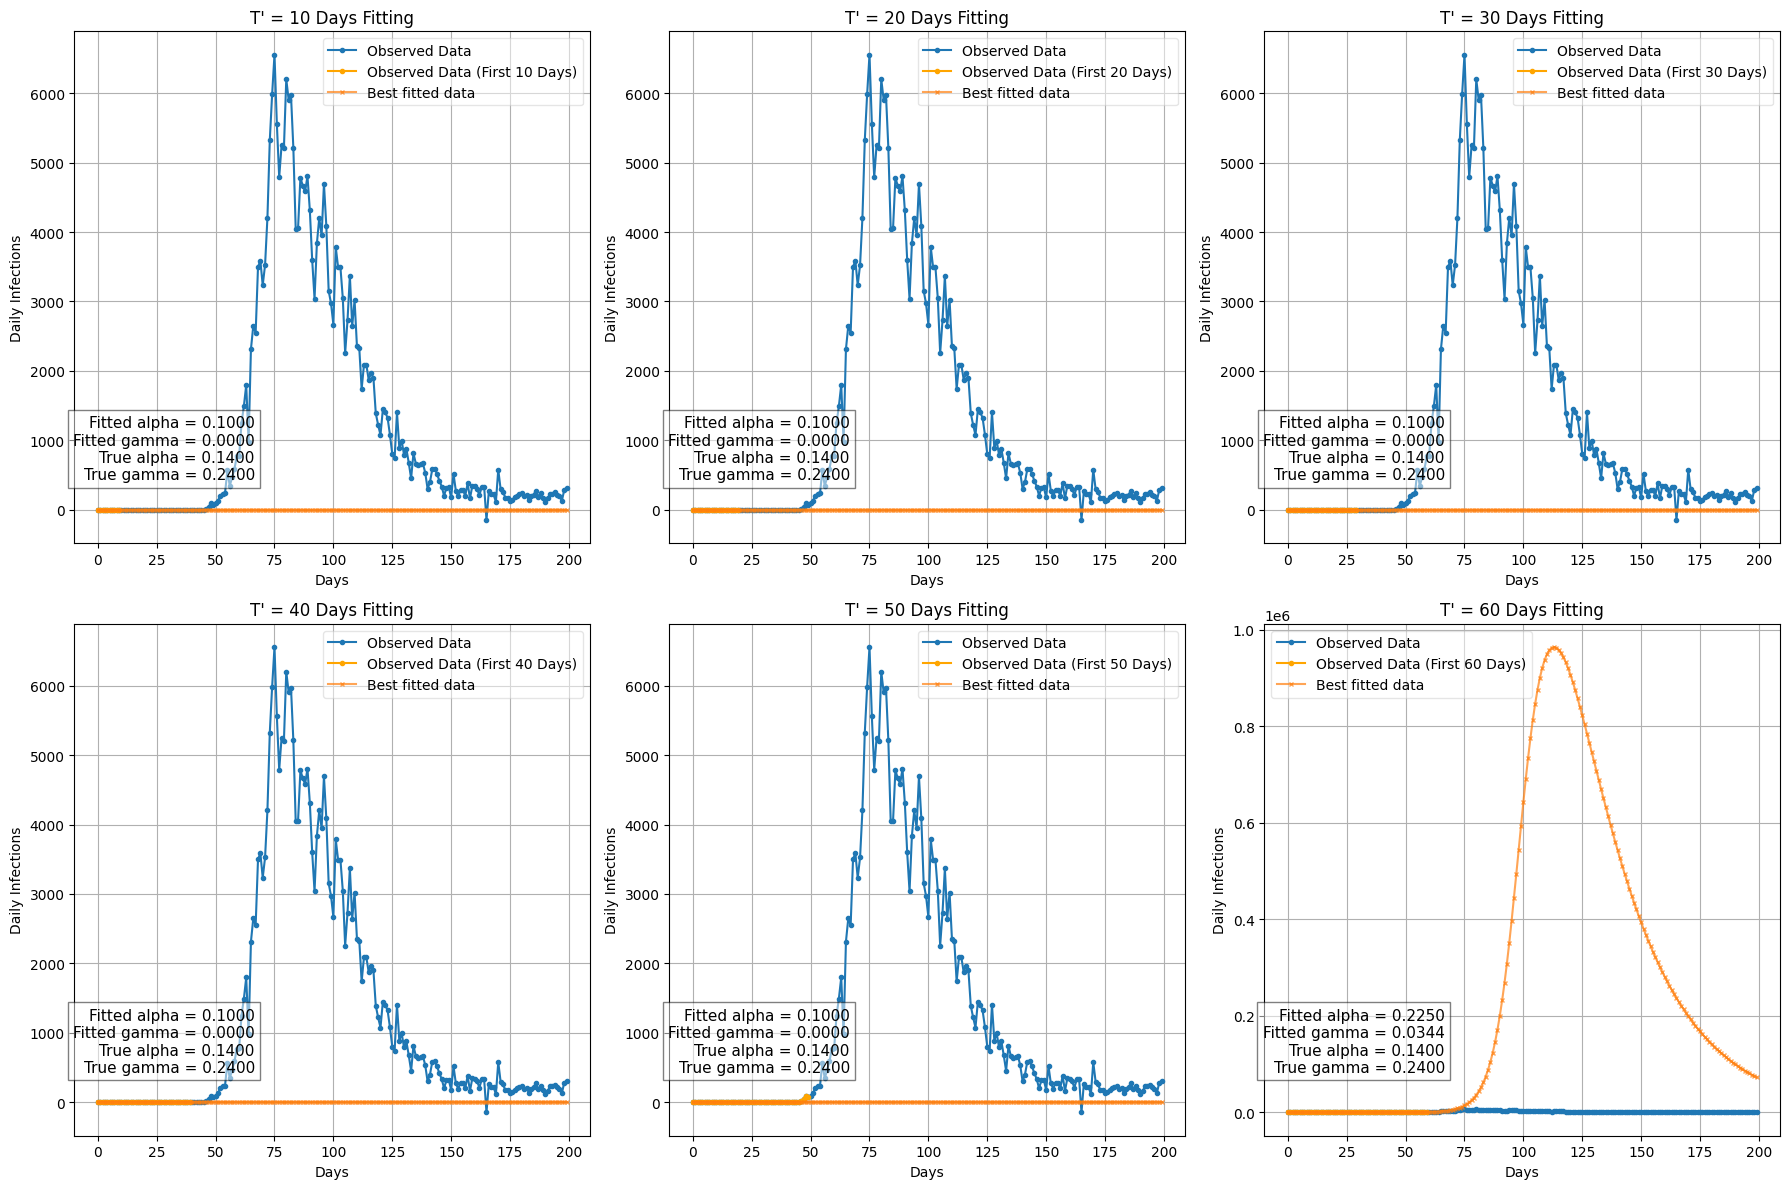

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import pandas as pd

# 已知的参数
beta = 0.1
delta_E = 0.01
delta_I = 0.01
delta_H = 0.01

# 总人口数量
N = 59037472

# 初始条件
S0 = N-1
E0 = 1
I0 = 0
H0 = 0
R0 = 0

# 生成完整数据集的天数
T = 200

# 用于生成数据的已知 alpha 和 gamma
alpha_true = 0.14
gamma_true = 0.24

# 生成合成数据的函数
def generate_data(alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T):
    S = np.zeros(T)
    E = np.zeros(T)
    I = np.zeros(T)
    H = np.zeros(T)
    R = np.zeros(T)
    daily_infections = np.zeros(T)

    S[0], E[0], I[0], H[0], R[0] = S0, E0, I0, H0, R0

    for t in range(1, T):
        S[t] = S[t-1] - ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1]
        E[t] = E[t-1] + ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1] - (beta + delta_E) * E[t-1]
        I[t] = I[t-1] + beta * E[t-1] - gamma * I[t-1]
        H[t] = H[t-1] + gamma * I[t-1] - delta_H * H[t-1]
        R[t] = R[t-1] + delta_E * E[t-1] + delta_I * I[t-1] + delta_H * H[t-1]
        daily_infections[t] = gamma * I[t]

    return daily_infections

# 替换原来的噪声数据生成，改为使用CSV文件中的真实数据
def load_real_data(file_path, column_name, T):
    data = pd.read_csv(file_path)
    # 获取指定列的数据
    cumulative_data = data[column_name].values[:T+1]  # 读取T+1天的数据以便计算T天的差分
    # 计算差分
    real_data = np.diff(cumulative_data)
    return real_data[:T]

# 使用L1范数（绝对值差异）作为目标函数
def objective(params, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data):
    alpha, gamma = params
    simulated_data = generate_data(alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime)
    return np.sum(np.abs(simulated_data[:T_prime] - observed_data[:T_prime]))

# 逐步拟合函数
def iterative_fitting(objective, initial_alpha, initial_gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data, tol=1e-4, max_iter=100):
    alpha = initial_alpha
    gamma = initial_gamma

    for iteration in range(max_iter):
        # Step 1: 固定 alpha，拟合 gamma
        result_gamma = minimize(lambda gamma: objective([alpha, gamma], beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data),
                                x0=gamma, bounds=[(0.0, 1.0)])
        new_gamma = result_gamma.x[0]

        # Step 2: 固定 gamma，拟合 alpha
        result_alpha = minimize(lambda alpha: objective([alpha, new_gamma], beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data),
                                x0=alpha, bounds=[(0.0, 1.0)])
        new_alpha = result_alpha.x[0]

        # 检查收敛性
        if abs(new_alpha - alpha) < tol and abs(new_gamma - gamma) < tol:
            print(f"Converged after {iteration + 1} iterations.")
            break

        alpha, gamma = new_alpha, new_gamma

    return alpha, gamma

# 反向检查函数
def reverse_check(objective, alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data, tol=1e-4, max_iter=10):
    for iteration in range(max_iter):
        # 固定 gamma，拟合 alpha
        result_alpha = minimize(lambda alpha: objective([alpha, gamma], beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data),
                                x0=alpha, bounds=[(0.0, 1.0)])
        new_alpha = result_alpha.x[0]

        # 固定 alpha，拟合 gamma
        result_gamma = minimize(lambda gamma: objective([new_alpha, gamma], beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data),
                                x0=gamma, bounds=[(0.0, 1.0)])
        new_gamma = result_gamma.x[0]

        # 检查两次结果的差异
        if abs(new_alpha - alpha) < tol and abs(new_gamma - gamma) < tol:
            print(f"Reverse check converged after {iteration + 1} iterations.")
            break

        alpha, gamma = new_alpha, new_gamma

    return alpha, gamma

# 从CSV文件中加载真实数据
file_path = 'cleaned_italy_data.csv'
observed_daily_infections_real = load_real_data(file_path, 'Confirmed', T)

# 直接同时拟合 alpha 和 gamma
T_prime_list = [10, 20, 30, 40, 50, 60]  # 根据需要修改这些值

# 应用逐步拟合和反向检查
def fit_with_iterative_method(full_observed_data, T_prime_list, T, initial_alpha, initial_gamma, point_size=6):
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))
    axs = axs.flatten()

    for i, T_prime in enumerate(T_prime_list):
        # 初始拟合
        alpha, gamma = iterative_fitting(objective, initial_alpha, initial_gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, full_observed_data)

        # 反向检查
        alpha, gamma = reverse_check(objective, alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, full_observed_data)

        # 生成使用估计 alpha 和 gamma 的拟合数据
        fitted_daily_infections = generate_data(alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T)

        # 绘制 T_prime 的结果
        days_full = np.arange(T)
        days_prime = np.arange(T_prime)

        # 绘制完整的观测数据和用于拟合的部分
        axs[i].plot(days_full, full_observed_data, 'o-', label='Observed Data', markersize=point_size)
        axs[i].plot(days_prime, full_observed_data[:T_prime], 'o-', label=f'Observed Data (First {T_prime} Days)', markersize=point_size, color='orange')

        # 绘制 T' 及其后的拟合数据
        axs[i].plot(days_full, fitted_daily_infections, 'x-', label=f'Best fitted data', markersize=point_size, alpha=0.7)

        # 注释拟合的 alpha 和 gamma 值
        axs[i].text(0.35, 0.25, f'Fitted alpha = {alpha:.4f}\nFitted gamma = {gamma:.4f}\nTrue alpha = {alpha_true:.4f}\nTrue gamma = {gamma_true:.4f}',
                    transform=axs[i].transAxes, fontsize=11, verticalalignment='top', horizontalalignment='right',
                    bbox=dict(facecolor='white', alpha=0.5))
        axs[i].set_xlabel('Days')
        axs[i].set_ylabel('Daily Infections')
        axs[i].set_title(f'T\' = {T_prime} Days Fitting')
        axs[i].legend(framealpha=0.5)
        axs[i].grid(True)

    plt.tight_layout()
    plt.show()

# 使用逐步拟合方法绘制多子图
initial_alpha = 0.1
initial_gamma = 0.1
fit_with_iterative_method(observed_daily_infections_real, T_prime_list, T, initial_alpha, initial_gamma, point_size=3)

##没有噪声的同步搜索，两个参数alpha和gamma

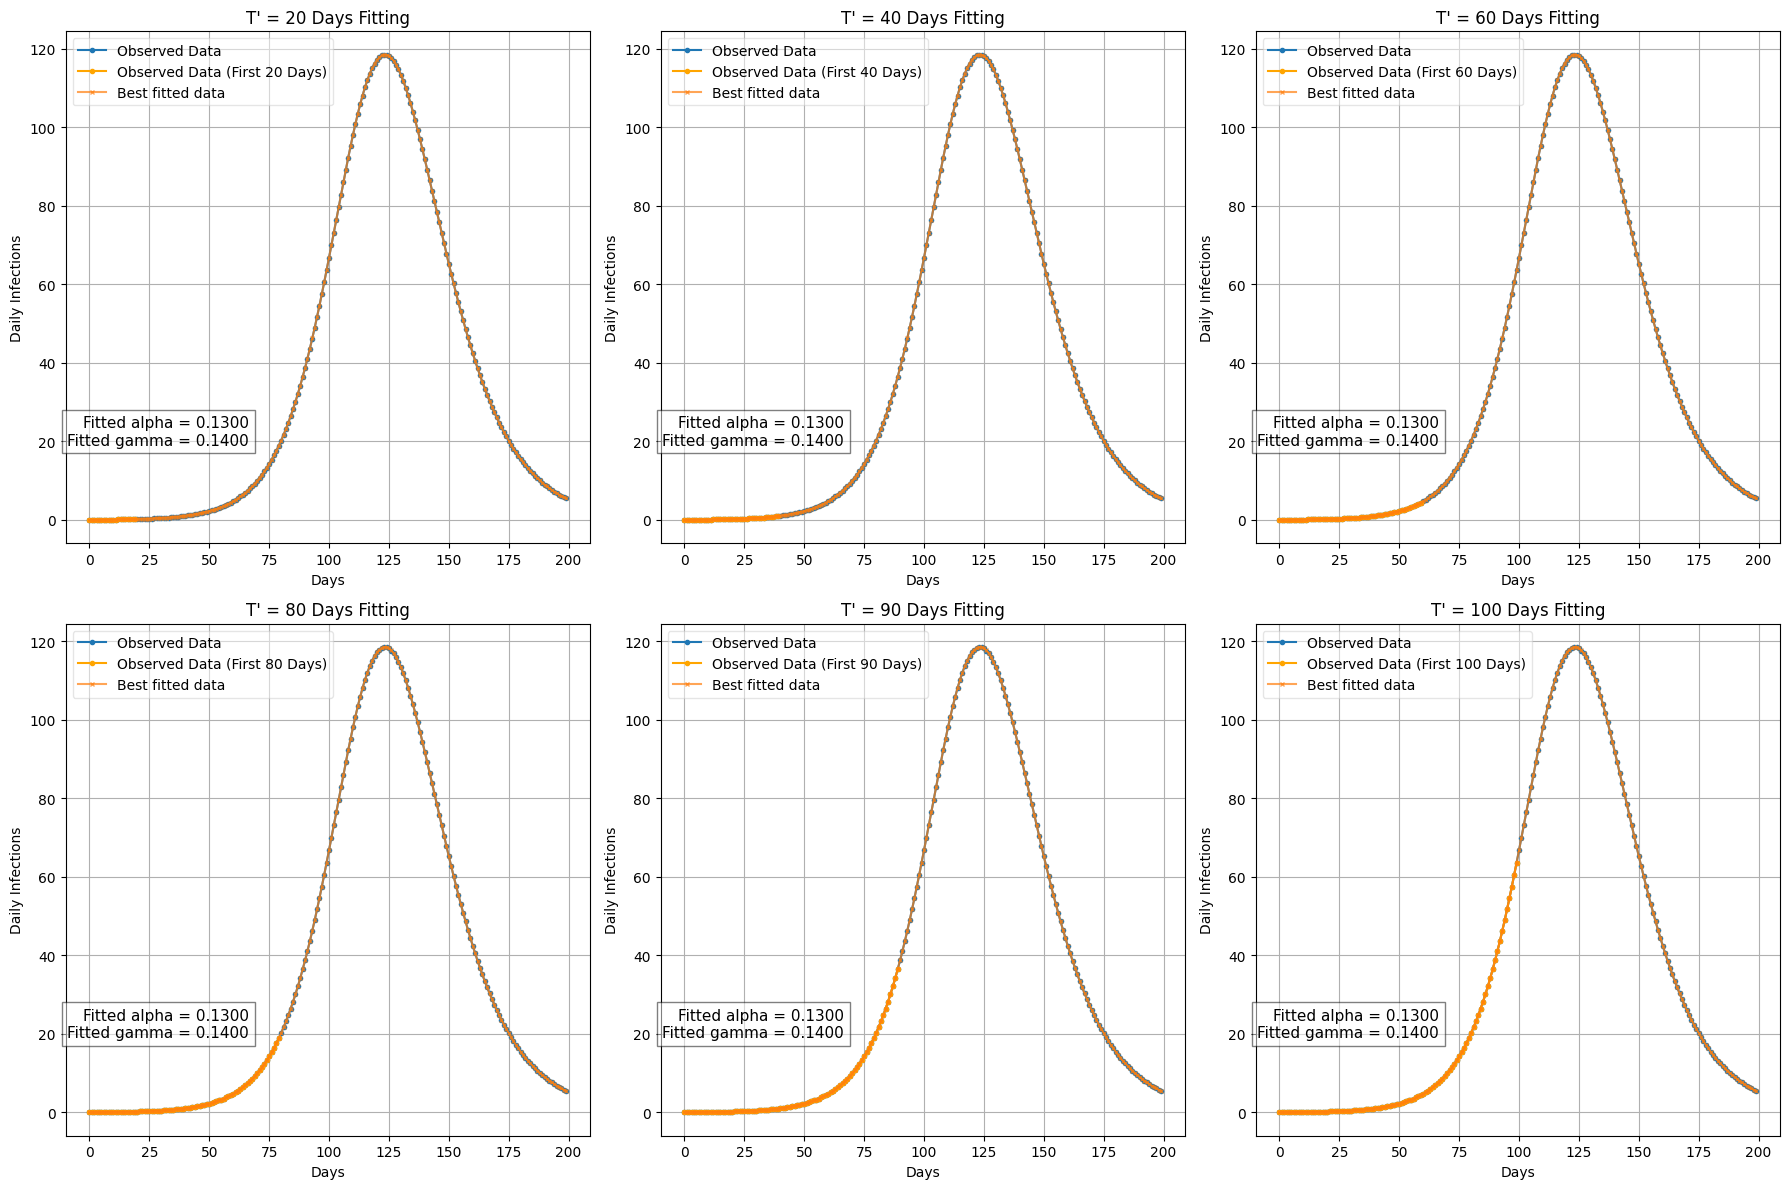

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 已知的参数
beta = 0.1
delta_E = 0.01
delta_I = 0.01
delta_H = 0.01

# 总人口数量
N = 10000

# 初始条件
S0 = N-1
E0 = 1
I0 = 0
H0 = 0
R0 = 0

# 生成完整数据集的天数
T = 200

# 用于生成数据的已知 alpha 和 gamma
alpha_true = 0.13
gamma_true = 0.14

# 生成合成数据的函数
def generate_data(alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T):
    S = np.zeros(T)
    E = np.zeros(T)
    I = np.zeros(T)
    H = np.zeros(T)
    R = np.zeros(T)
    daily_infections = np.zeros(T)

    S[0], E[0], I[0], H[0], R[0] = S0, E0, I0, H0, R0

    for t in range(1, T):
        S[t] = S[t-1] - ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1]
        E[t] = E[t-1] + ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1] - (beta + delta_E) * E[t-1]
        I[t] = I[t-1] + beta * E[t-1] - gamma * I[t-1]
        H[t] = H[t-1] + gamma * I[t-1] - delta_H * H[t-1]
        R[t] = R[t-1] + delta_E * E[t-1] + delta_I * I[t-1] + delta_H * H[t-1]
        daily_infections[t] = gamma * I[t]

    return daily_infections

# 目标函数，用于联合拟合 alpha 和 gamma
def objective(params, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data):
    alpha, gamma = params
    simulated_data = generate_data(alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime)
    return np.sum((simulated_data[:T_prime] - observed_data[:T_prime]) ** 2)

# 初始的 alpha 和 gamma 猜测值
initial_guess = [0.1, 0.1]

# 生成完整数据集的合成观测数据
observed_daily_infections = generate_data(alpha_true, gamma_true, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T)

# 直接同时拟合 alpha 和 gamma
T_prime_list = [20, 40, 60, 80, 90, 100]  # 根据需要修改这些值

# Visualization function with multiple subplots
def plot_results_multisubplot(full_observed_data, T_prime_list, T, point_size=6):
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))
    axs = axs.flatten()

    for i, T_prime in enumerate(T_prime_list):
        # 联合拟合 alpha 和 gamma，添加边界条件
        bounds = [(0.0, 1.0), (0.0, 1.0)]
        result = minimize(objective, initial_guess, args=(beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, full_observed_data), bounds=bounds)
        fitted_alpha, fitted_gamma = result.x

        # Generate the fitted data with the estimated alpha and gamma for T_prime
        fitted_daily_infections = generate_data(fitted_alpha, fitted_gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T)

        # Plotting the results for T_prime
        days_full = np.arange(T)
        days_prime = np.arange(T_prime)

        # Plot full observed data and the part used for fitting
        axs[i].plot(days_full, full_observed_data, 'o-', label='Observed Data', markersize=point_size)
        axs[i].plot(days_prime, full_observed_data[:T_prime], 'o-', label=f'Observed Data (First {T_prime} Days)', markersize=point_size, color='orange')

        # Plot the fitted data for T' and beyond
        axs[i].plot(days_full, fitted_daily_infections, 'x-', label=f'Best fitted data', markersize=point_size, alpha=0.7)

        # Annotate the fitted alpha and gamma values
        axs[i].text(0.35, 0.25, f'Fitted alpha = {fitted_alpha:.4f}\nFitted gamma = {fitted_gamma:.4f}',
                    transform=axs[i].transAxes, fontsize=11, verticalalignment='top', horizontalalignment='right',
                    bbox=dict(facecolor='white', alpha=0.5))
        axs[i].set_xlabel('Days')
        axs[i].set_ylabel('Daily Infections')
        axs[i].set_title(f'T\' = {T_prime} Days Fitting')
        axs[i].legend(framealpha = 0.5)
        axs[i].grid(True)

    plt.tight_layout()
    plt.show()

# 使用未添加噪声的数据绘制多子图
plot_results_multisubplot(observed_daily_infections, T_prime_list, T, point_size=3)


##有噪声的同步搜索，两个参数alpha和gamma

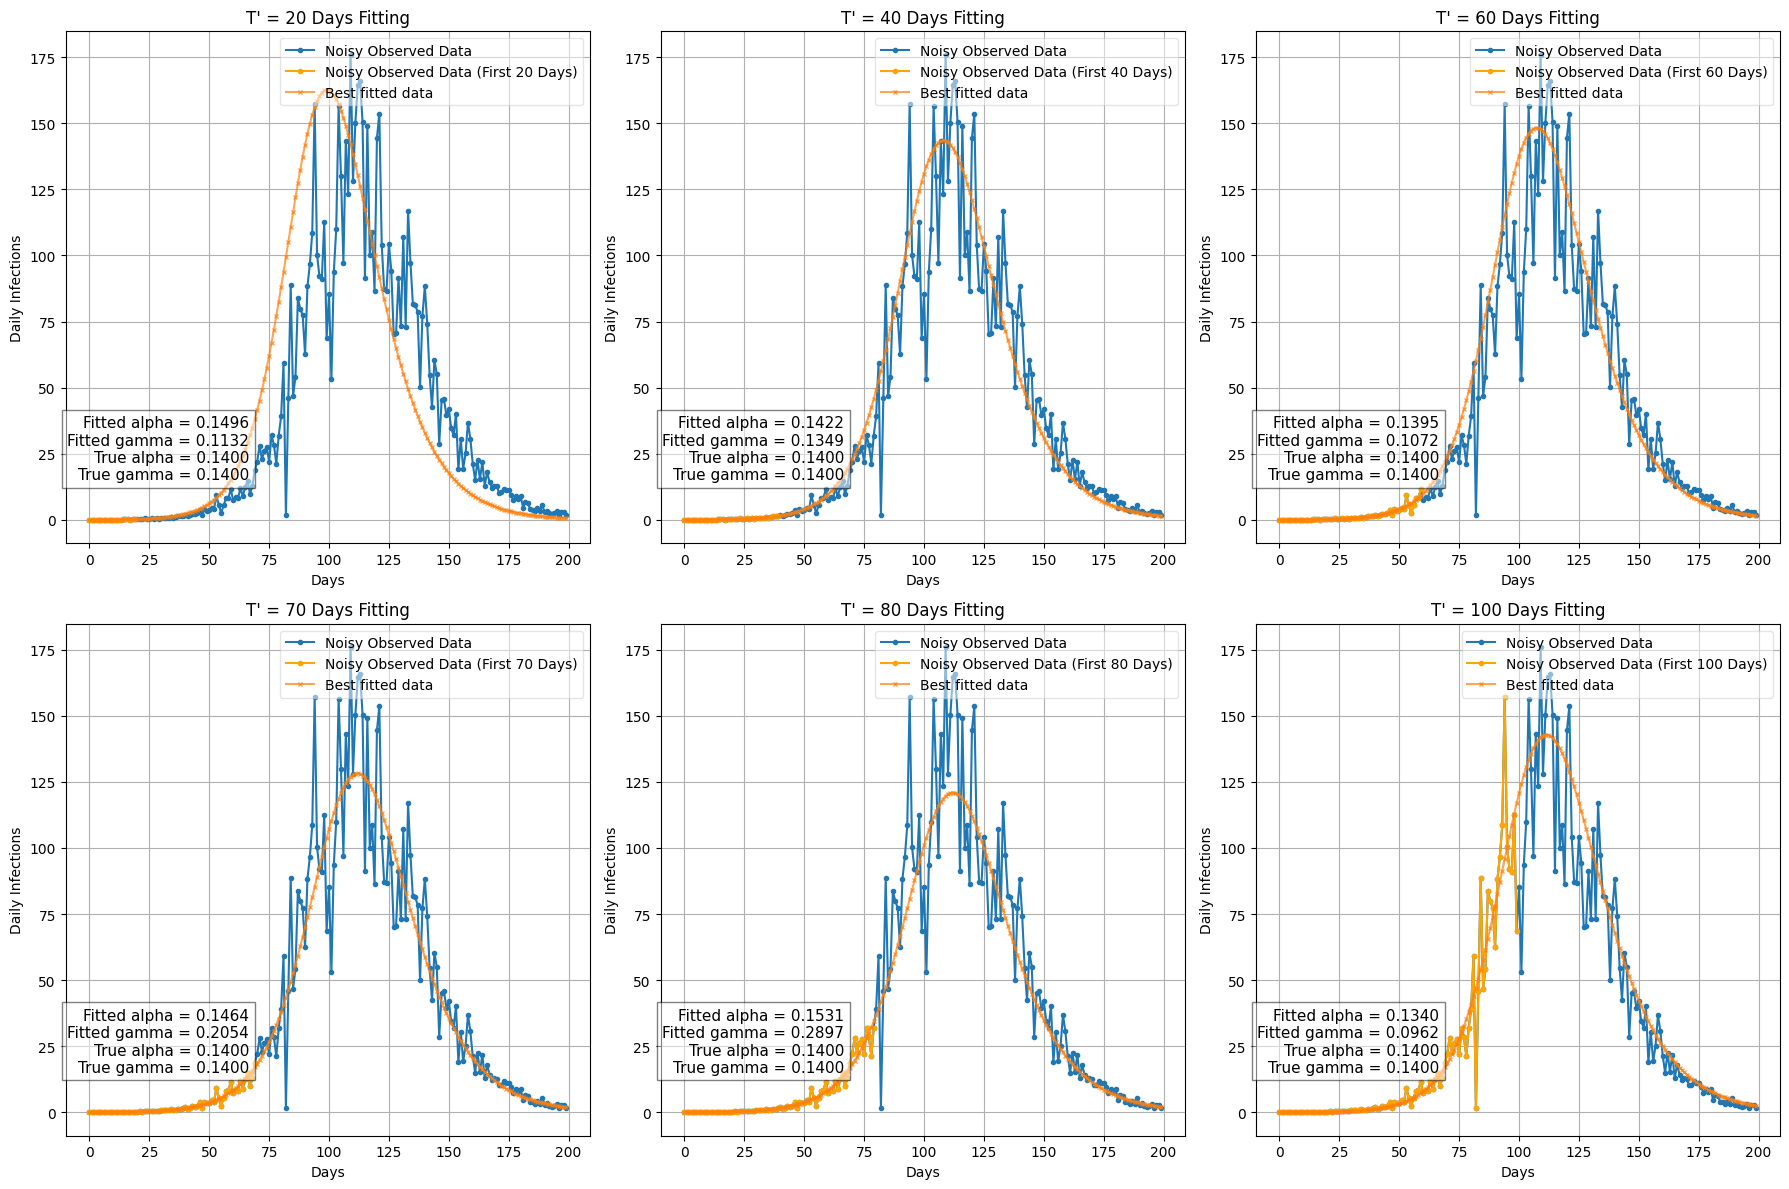

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 已知的参数
beta = 0.1
delta_E = 0.01
delta_I = 0.01
delta_H = 0.01

# 总人口数量
N = 10000

# 初始条件
S0 = N-1
E0 = 1
I0 = 0
H0 = 0
R0 = 0

# 生成完整数据集的天数
T = 200

# 用于生成数据的已知 alpha 和 gamma
alpha_true = 0.14
gamma_true = 0.14

# 生成合成数据的函数
def generate_data(alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T):
    S = np.zeros(T)
    E = np.zeros(T)
    I = np.zeros(T)
    H = np.zeros(T)
    R = np.zeros(T)
    daily_infections = np.zeros(T)

    S[0], E[0], I[0], H[0], R[0] = S0, E0, I0, H0, R0

    for t in range(1, T):
        S[t] = S[t-1] - ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1]
        E[t] = E[t-1] + ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1] - (beta + delta_E) * E[t-1]
        I[t] = I[t-1] + beta * E[t-1] - gamma * I[t-1]
        H[t] = H[t-1] + gamma * I[t-1] - delta_H * H[t-1]
        R[t] = R[t-1] + delta_E * E[t-1] + delta_I * I[t-1] + delta_H * H[t-1]
        daily_infections[t] = gamma * I[t]

    return daily_infections

# 替换加噪声函数，使用 epsilon 替代 alpha
def add_custom_noise(data, p=0.1, a=1, gaussian_std=0.1):
    # 生成 p 为 0 或 1 的二项分布
    p_values = np.random.binomial(1, p, size=data.shape)

    # 生成 u(-1,1) 的均匀噪声
    uniform_noise = np.random.uniform(-1, 1, size=data.shape)

    # 生成 N(0, gaussian_std) 的高斯噪声
    gaussian_noise = np.random.normal(0, gaussian_std, size=data.shape)

    # 计算 epsilon = p * a * u(-1,1) + N(0, gaussian_std)
    epsilon = p_values * a * uniform_noise + gaussian_noise

    # 生成带噪声的观测数据 Y = y * (1 + epsilon)
    noisy_data = data * (1 + epsilon)

    # 确保噪声后数据为非负数
    noisy_data[noisy_data < 0] = 0

    return noisy_data

# 使用L1范数（绝对值差异）作为目标函数
def objective(params, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data):
    alpha, gamma = params
    simulated_data = generate_data(alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime)
    return np.sum(np.abs(simulated_data[:T_prime] - observed_data[:T_prime]))

# 初始的 alpha 和 gamma 猜测值
initial_guess = [0.1, 0.1]

# 生成完整数据集的合成观测数据
observed_daily_infections = generate_data(alpha_true, gamma_true, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T)

# 向生成的数据添加自定义噪声
observed_daily_infections_noisy = add_custom_noise(observed_daily_infections, p=0.1, a=1, gaussian_std=0.2)

# 直接同时拟合 alpha 和 gamma
T_prime_list = [20, 40, 60, 70, 80, 100]  # 根据需要修改这些值

# Visualization function with multiple subplots
def plot_results_multisubplot(full_observed_data, T_prime_list, T, point_size=6):
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))
    axs = axs.flatten()

    for i, T_prime in enumerate(T_prime_list):
        # 联合拟合 alpha 和 gamma，添加边界条件
        bounds = [(0.0, 1.0), (0.0, 1.0)]
        result = minimize(objective, initial_guess, args=(beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, full_observed_data), bounds=bounds)
        fitted_alpha, fitted_gamma = result.x

        # 生成使用估计 alpha 和 gamma 的拟合数据
        fitted_daily_infections = generate_data(fitted_alpha, fitted_gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T)

        # 绘制 T_prime 的结果
        days_full = np.arange(T)
        days_prime = np.arange(T_prime)

        # 绘制完整的观测数据和用于拟合的部分
        axs[i].plot(days_full, full_observed_data, 'o-', label='Noisy Observed Data', markersize=point_size)
        axs[i].plot(days_prime, full_observed_data[:T_prime], 'o-', label=f'Noisy Observed Data (First {T_prime} Days)', markersize=point_size, color='orange')

        # 绘制 T' 及其后的拟合数据
        axs[i].plot(days_full, fitted_daily_infections, 'x-', label=f'Best fitted data', markersize=point_size, alpha=0.7)

        # 注释拟合的 alpha 和 gamma 值
        axs[i].text(0.35, 0.25, f'Fitted alpha = {fitted_alpha:.4f}\nFitted gamma = {fitted_gamma:.4f}\nTrue alpha = {alpha_true:.4f}\nTrue gamma = {gamma_true:.4f}',
                    transform=axs[i].transAxes, fontsize=11, verticalalignment='top', horizontalalignment='right',
                    bbox=dict(facecolor='white', alpha=0.5))
        axs[i].set_xlabel('Days')
        axs[i].set_ylabel('Daily Infections')
        axs[i].set_title(f'T\' = {T_prime} Days Fitting')
        axs[i].legend(framealpha = 0.5)
        axs[i].grid(True)

    plt.tight_layout()
    plt.show()

# 使用添加噪声的数据绘制多子图
plot_results_multisubplot(observed_daily_infections_noisy, T_prime_list, T, point_size=3)


<ipython-input-30-7c32d0f8168e>:43: RuntimeWarning: overflow encountered in scalar multiply
  S[t] = S[t-1] - ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1]
<ipython-input-30-7c32d0f8168e>:44: RuntimeWarning: overflow encountered in scalar multiply
  E[t] = E[t-1] + ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1] - (beta + delta_E) * E[t-1]
<ipython-input-30-7c32d0f8168e>:44: RuntimeWarning: invalid value encountered in scalar subtract
  E[t] = E[t-1] + ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1] - (beta + delta_E) * E[t-1]
<ipython-input-30-7c32d0f8168e>:48: RuntimeWarning: overflow encountered in scalar multiply
  daily_infections[t] = gamma * I[t]
<ipython-input-30-7c32d0f8168e>:45: RuntimeWarning: overflow encountered in scalar multiply
  I[t] = I[t-1] + beta * E[t-1] - gamma * I[t-1]
<ipython-input-30-7c32d0f8168e>:45: RuntimeWarning: invalid value encountered in scalar subtract
  I[t] = I[t-1] + beta * E[t-1] - gamma * I[t-1]
<ipython-input-30-7c32d0f816

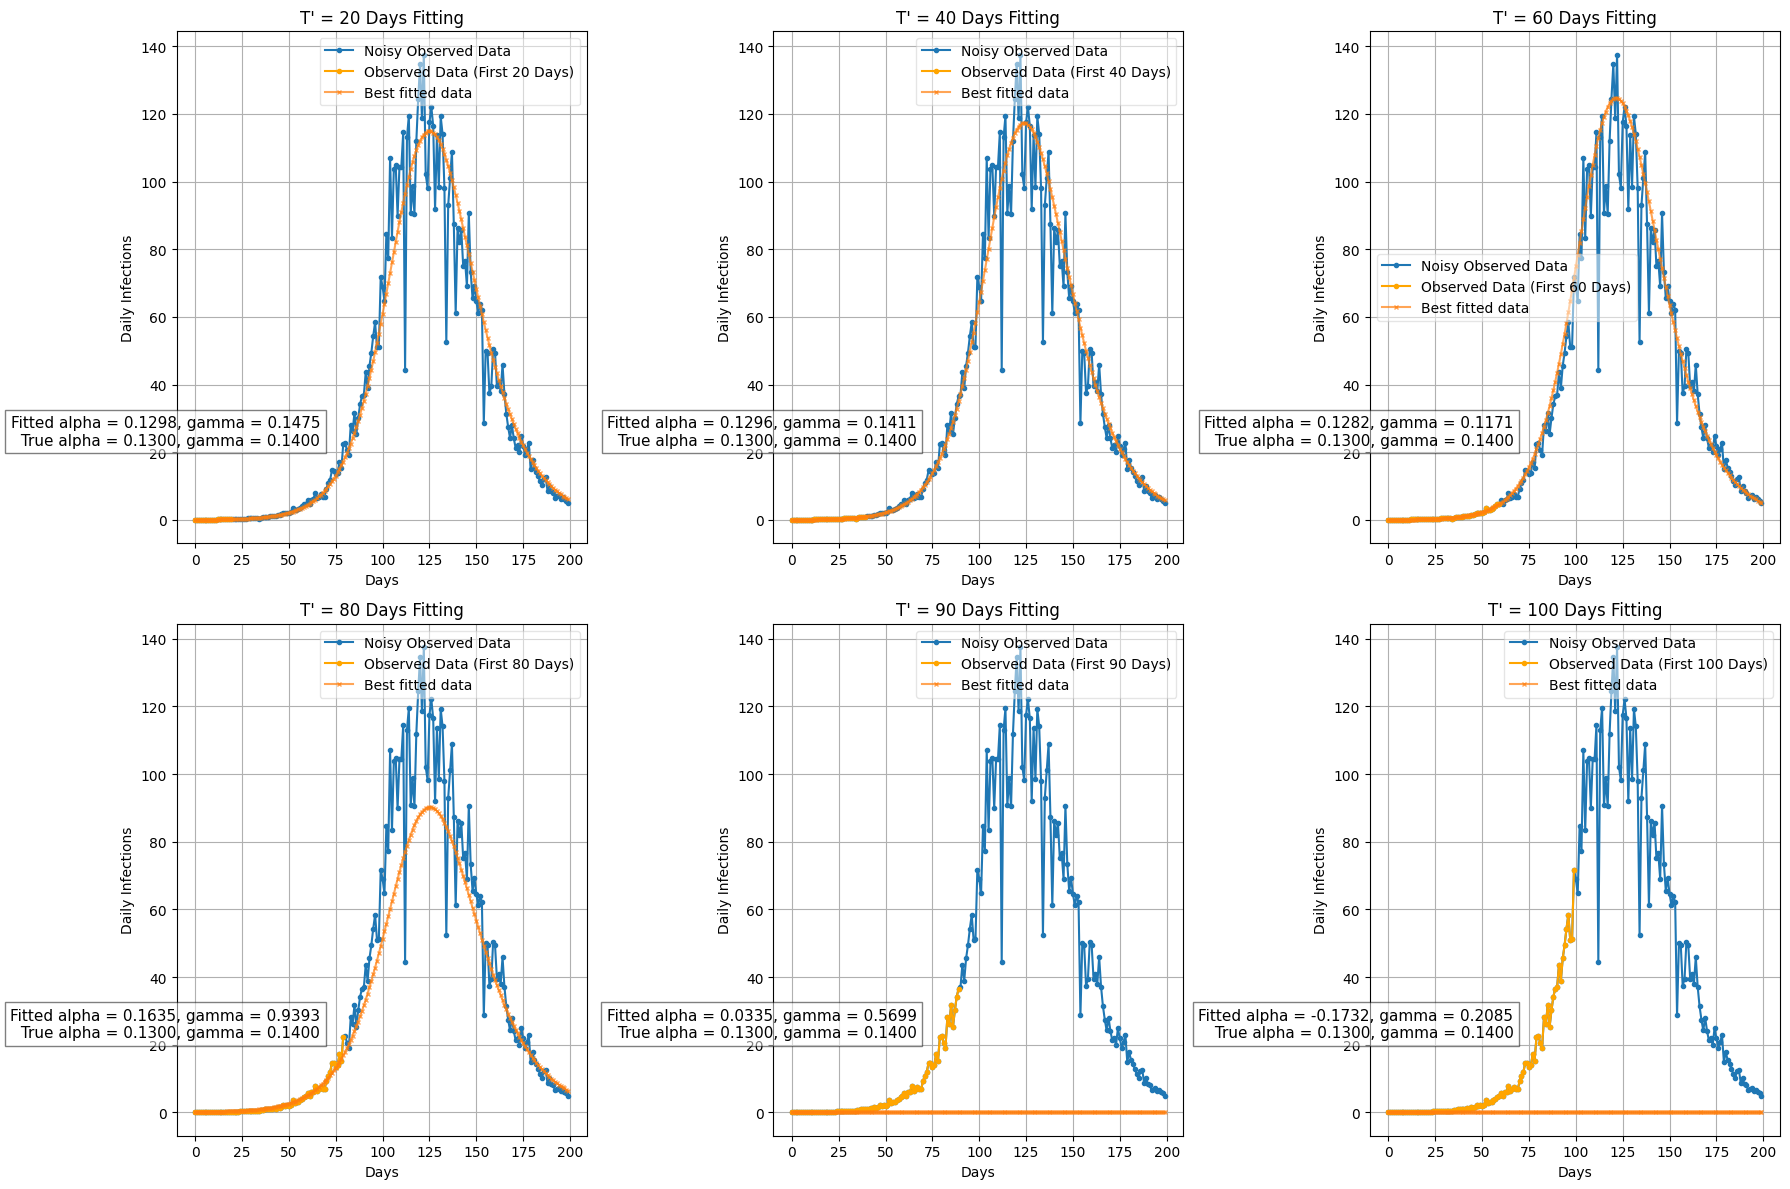

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 设置随机数种子以确保每次实验生成相同的数据
np.random.seed(42)

# 已知的其他参数
beta = 0.1
delta_E = 0.01
delta_I = 0.01
delta_H = 0.01

# 总人口数量
N = 10000

# 初始条件
S0 = N-1
E0 = 1
I0 = 0
H0 = 0
R0 = 0

# 生成完整数据集的天数
T = 200

# 用于生成数据的已知 alpha 和 gamma
alpha_true = 0.13
gamma_true = 0.14

# 生成合成数据的函数
def generate_data(alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T):
    S = np.zeros(T)
    E = np.zeros(T)
    I = np.zeros(T)
    H = np.zeros(T)
    R = np.zeros(T)
    daily_infections = np.zeros(T)

    S[0], E[0], I[0], H[0], R[0] = S0, E0, I0, H0, R0

    for t in range(1, T):
        S[t] = S[t-1] - ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1]
        E[t] = E[t-1] + ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1] - (beta + delta_E) * E[t-1]
        I[t] = I[t-1] + beta * E[t-1] - gamma * I[t-1]
        H[t] = H[t-1] + gamma * I[t-1] - delta_H * H[t-1]
        R[t] = R[t-1] + delta_E * E[t-1] + delta_I * I[t-1] + delta_H * H[t-1]
        daily_infections[t] = gamma * I[t]

    return daily_infections

# 向数据添加噪声的函数（p为0或1的二项分布）
def add_custom_noise(data, p_prob=0.1, a=1):
    # 生成 p 为 0 或 1 的二项分布
    p_values = np.random.binomial(1, p_prob, size=data.shape)

    # 生成 u(-1,1) 的均匀噪声
    uniform_noise = np.random.uniform(-1, 1, size=data.shape)

    # 生成 N(0, 0.1) 的高斯噪声
    gaussian_noise = np.random.normal(0, 0.1, size=data.shape)

    # 计算 epsilon = p * a * u(-1,1) + N(0,0.1)
    epsilon = p_values * a * uniform_noise + gaussian_noise

    # 生成带噪声的观测数据 Y = y * (1 + epsilon)
    noisy_data = data * (1 + epsilon)

    # 确保噪声后数据为非负数
    noisy_data[noisy_data < 0] = 0

    return noisy_data

# 使用L1范数（绝对值差异）作为目标函数，同时拟合 alpha 和 gamma
def objective(params, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data):
    alpha, gamma = params
    simulated_data = generate_data(alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime)
    return np.sum(np.abs(simulated_data[:T_prime] - observed_data[:T_prime]))

# 执行多次随机重启的优化过程，拟合 alpha 和 gamma
def random_restart_optimization(restarts, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data):
    best_result = None
    best_params = None
    best_loss = float('inf')

    for i in range(restarts):
        # 生成随机的初始 alpha 和 gamma 猜测值
        alpha_guess = np.random.uniform(0, 1)
        gamma_guess = np.random.uniform(0, 1)
        initial_guess = [alpha_guess, gamma_guess]

        # 执行优化
        result = minimize(objective, initial_guess, args=(beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data))

        # 如果找到更好的结果，则保存它
        if result.fun < best_loss:
            best_loss = result.fun
            best_result = result
            best_params = result.x

    return best_params, best_result

# Visualization function with multiple subplots
def plot_results_multisubplot(full_observed_data, T_prime_list, T, restarts, point_size=6):
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))
    axs = axs.flatten()

    for i, T_prime in enumerate(T_prime_list):
        # 使用随机重启进行优化，拟合 alpha 和 gamma
        best_params, _ = random_restart_optimization(restarts, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, full_observed_data)
        alpha_fitted, gamma_fitted = best_params

        # 生成使用估计 alpha 和 gamma 的拟合数据
        fitted_daily_infections = generate_data(alpha_fitted, gamma_fitted, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T)

        # 绘制 T_prime 的结果
        days_full = np.arange(T)
        days_prime = np.arange(T_prime)

        # 绘制完整的观测数据和用于拟合的部分
        axs[i].plot(days_full, full_observed_data, 'o-', label='Noisy Observed Data', markersize=point_size)
        axs[i].plot(days_prime, full_observed_data[:T_prime], 'o-', label=f'Observed Data (First {T_prime} Days)', markersize=point_size, color='orange')

        # 绘制 T' 及其后的拟合数据
        axs[i].plot(days_full, fitted_daily_infections, 'x-', label=f'Best fitted data', markersize=point_size, alpha=0.7)

        # 注释拟合的 alpha 和 gamma 值
        axs[i].text(0.35, 0.25, f'Fitted alpha = {alpha_fitted:.4f}, gamma = {gamma_fitted:.4f}\n True alpha = {alpha_true:.4f}, gamma = {gamma_true:.4f}',
                    transform=axs[i].transAxes, fontsize=11, verticalalignment='top', horizontalalignment='right',
                    bbox=dict(facecolor='white', alpha=0.5))
        axs[i].set_xlabel('Days')
        axs[i].set_ylabel('Daily Infections')
        axs[i].set_title(f'T\' = {T_prime} Days Fitting')
        axs[i].legend(framealpha = 0.5)
        axs[i].grid(True)

    plt.tight_layout()
    plt.show()

# 生成完整数据集的合成观测数据
observed_daily_infections = generate_data(alpha_true, gamma_true, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T)

# 向生成的数据添加自定义噪声
observed_daily_infections_noisy = add_custom_noise(observed_daily_infections, p_prob=0.1, a=.5)

# 指定每个子图的不同 T' 天数
T_prime_list = [20, 40, 60, 80, 90, 100]  # 根据需要修改这些值

# 使用带噪声的数据绘制多子图，设置随机重启次数
restarts = 10  # 设置重启次数，例如 10 次
plot_results_multisubplot(observed_daily_infections_noisy, T_prime_list, T, restarts, point_size=3)


##没有噪声的网格搜索

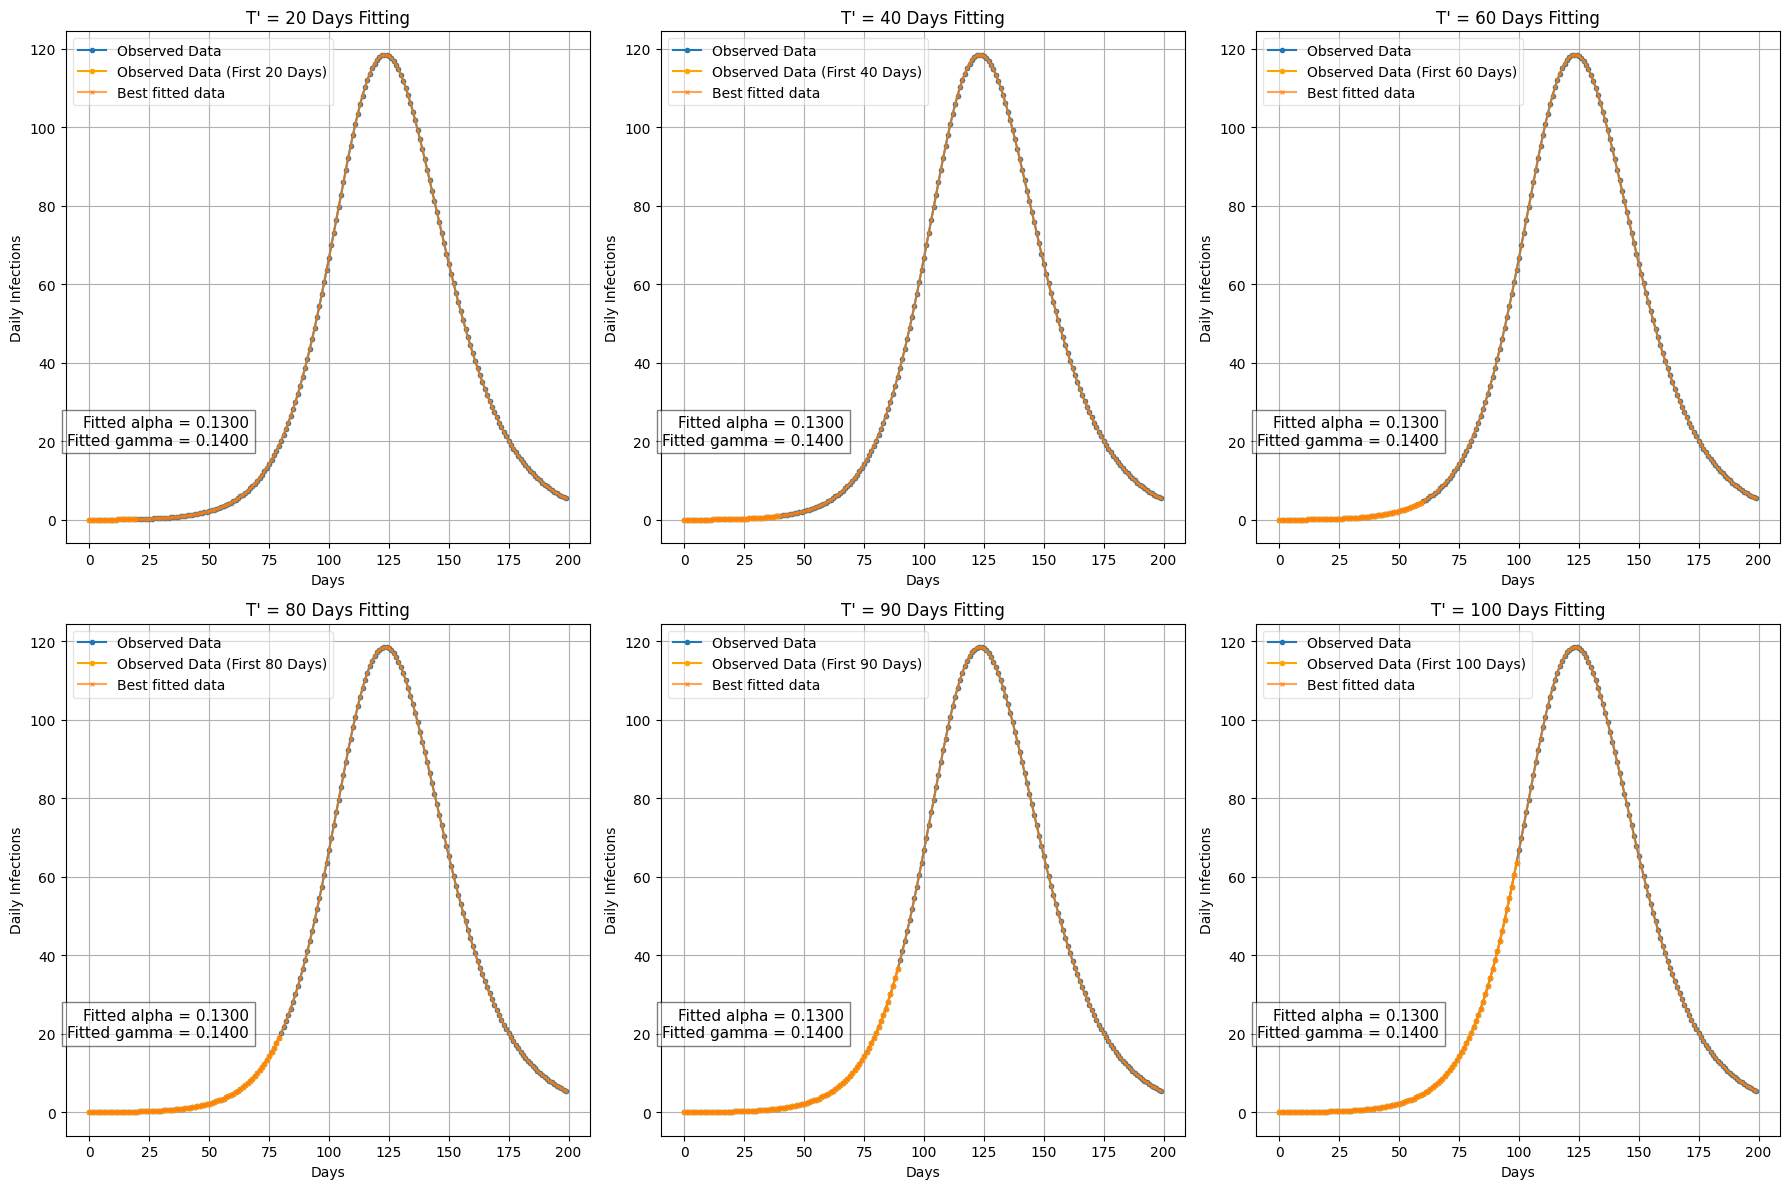

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# 已知的参数
beta = 0.1
delta_E = 0.01
delta_I = 0.01
delta_H = 0.01

# 总人口数量
N = 10000

# 初始条件
S0 = N-1
E0 = 1
I0 = 0
H0 = 0
R0 = 0

# 生成完整数据集的天数
T = 200

# 用于生成数据的已知 alpha 和 gamma
alpha_true = 0.13
gamma_true = 0.14

# 生成合成数据的函数
def generate_data(alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T):
    S = np.zeros(T)
    E = np.zeros(T)
    I = np.zeros(T)
    H = np.zeros(T)
    R = np.zeros(T)
    daily_infections = np.zeros(T)

    S[0], E[0], I[0], H[0], R[0] = S0, E0, I0, H0, R0

    for t in range(1, T):
        S[t] = S[t-1] - ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1]
        E[t] = E[t-1] + ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1] - (beta + delta_E) * E[t-1]
        I[t] = I[t-1] + beta * E[t-1] - gamma * I[t-1]
        H[t] = H[t-1] + gamma * I[t-1] - delta_H * H[t-1]
        R[t] = R[t-1] + delta_E * E[t-1] + delta_I * I[t-1] + delta_H * H[t-1]
        daily_infections[t] = gamma * I[t]

    return daily_infections

# 目标函数，用于计算 alpha 和 gamma 的组合
def objective(alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data):
    simulated_data = generate_data(alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime)
    return np.sum((simulated_data[:T_prime] - observed_data[:T_prime]) ** 2)

# 网格搜索函数
def grid_search(alpha_range, gamma_range, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data):
    best_score = float('inf')
    best_params = None

    for alpha, gamma in product(alpha_range, gamma_range):
        score = objective(alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data)
        if score < best_score:
            best_score = score
            best_params = (alpha, gamma)

    return best_params

# 生成完整数据集的合成观测数据
observed_daily_infections = generate_data(alpha_true, gamma_true, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T)

# 网格搜索参数范围
alpha_range = np.linspace(0.01, 0.2, 20)  # 0.01 到 0.2 之间的 20 个值
gamma_range = np.linspace(0.01, 0.2, 20)  # 0.01 到 0.2 之间的 20 个值

T_prime_list = [20, 40, 60, 80, 90, 100]  # 根据需要修改这些值

# Visualization function with multiple subplots
def plot_results_multisubplot(full_observed_data, T_prime_list, T, point_size=6):
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))
    axs = axs.flatten()

    for i, T_prime in enumerate(T_prime_list):
        # 使用网格搜索寻找最佳 alpha 和 gamma
        fitted_alpha, fitted_gamma = grid_search(alpha_range, gamma_range, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, full_observed_data)

        # Generate the fitted data with the estimated alpha and gamma for T_prime
        fitted_daily_infections = generate_data(fitted_alpha, fitted_gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T)

        # Plotting the results for T_prime
        days_full = np.arange(T)
        days_prime = np.arange(T_prime)

        # Plot full observed data and the part used for fitting
        axs[i].plot(days_full, full_observed_data, 'o-', label='Observed Data', markersize=point_size)
        axs[i].plot(days_prime, full_observed_data[:T_prime], 'o-', label=f'Observed Data (First {T_prime} Days)', markersize=point_size, color='orange')

        # Plot the fitted data for T' and beyond
        axs[i].plot(days_full, fitted_daily_infections, 'x-', label=f'Best fitted data', markersize=point_size, alpha=0.7)

        # Annotate the fitted alpha and gamma values
        axs[i].text(0.35, 0.25, f'Fitted alpha = {fitted_alpha:.4f}\nFitted gamma = {fitted_gamma:.4f}',
                    transform=axs[i].transAxes, fontsize=11, verticalalignment='top', horizontalalignment='right',
                    bbox=dict(facecolor='white', alpha=0.5))
        axs[i].set_xlabel('Days')
        axs[i].set_ylabel('Daily Infections')
        axs[i].set_title(f'T\' = {T_prime} Days Fitting')
        axs[i].legend(framealpha = 0.5)
        axs[i].grid(True)

    plt.tight_layout()
    plt.show()

# 使用网格搜索后的参数绘制多子图
plot_results_multisubplot(observed_daily_infections, T_prime_list, T, point_size=3)


##有噪声的网格搜索

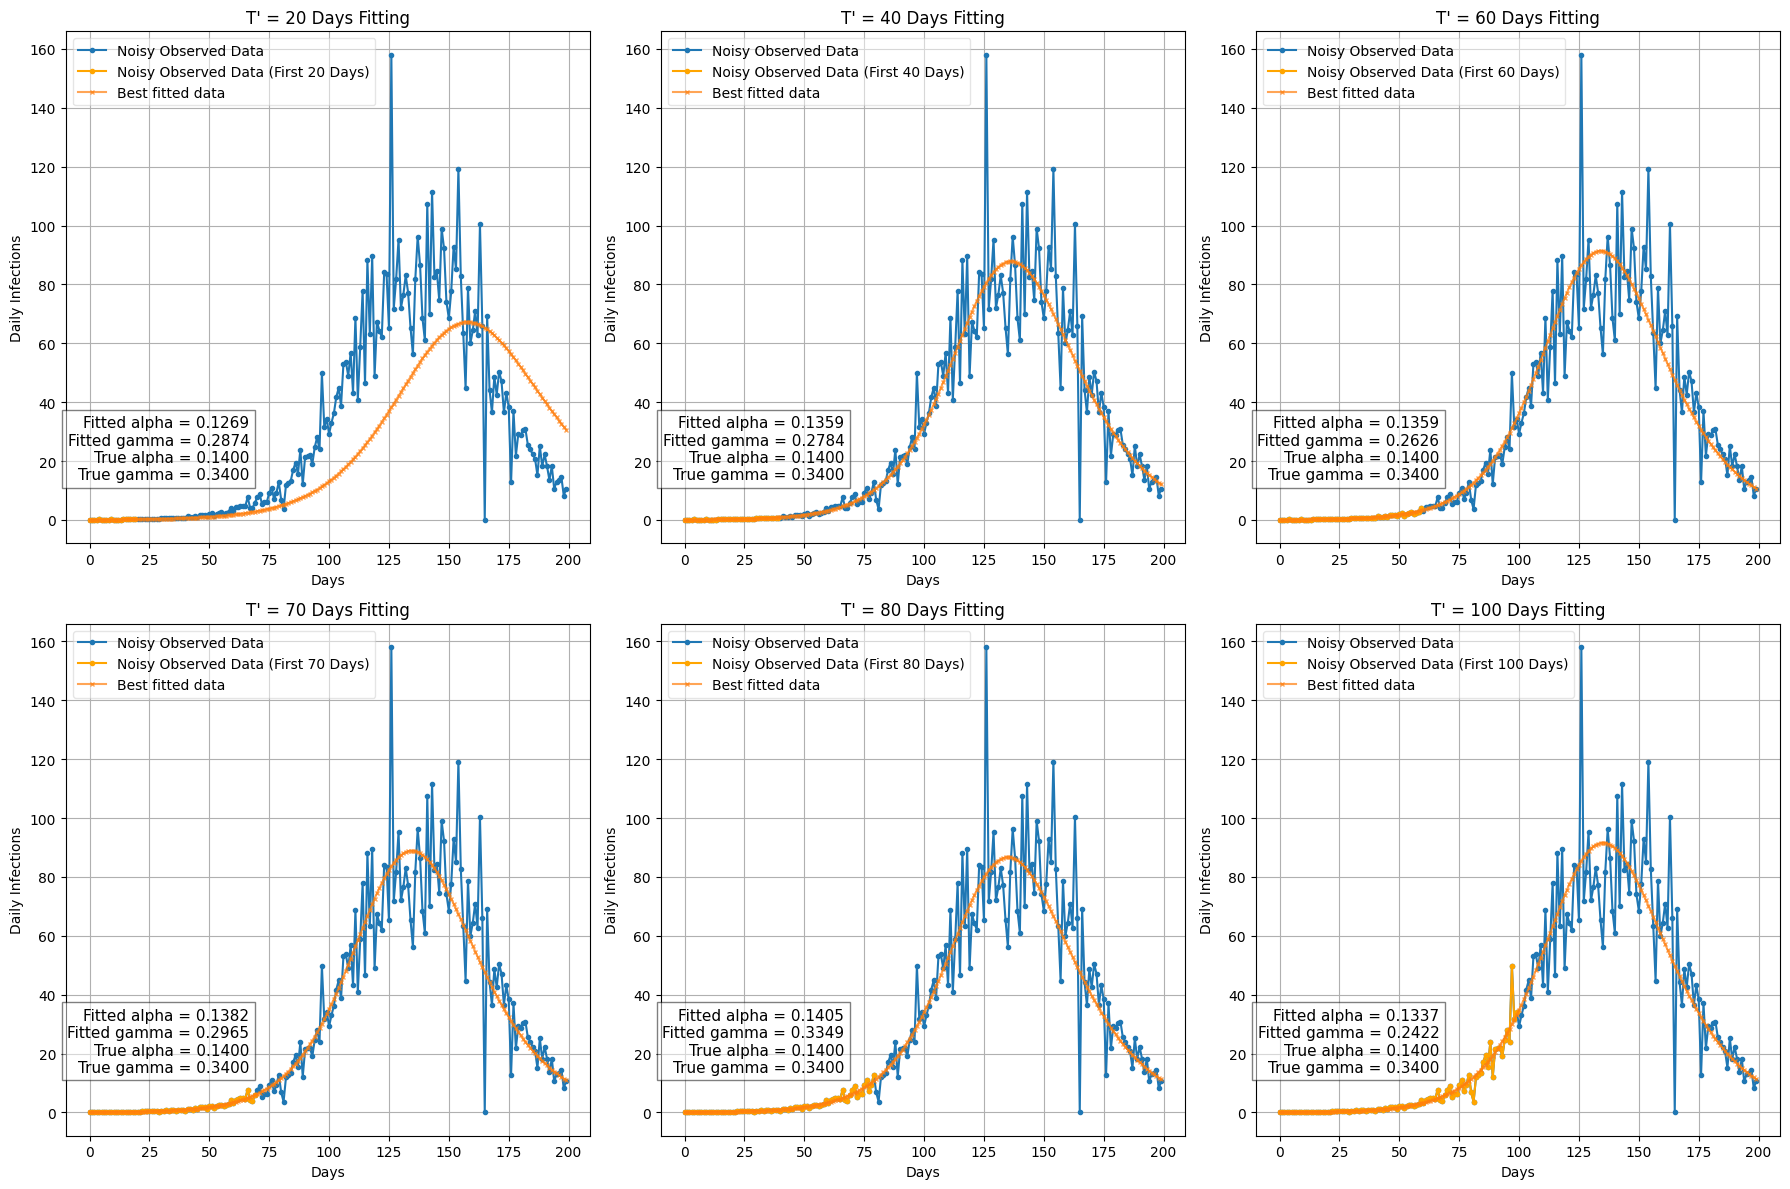

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 已知的参数
beta = 0.1
delta_E = 0.01
delta_I = 0.01
delta_H = 0.01

# 总人口数量
N = 10000

# 初始条件
S0 = N-1
E0 = 1
I0 = 0
H0 = 0
R0 = 0

# 生成完整数据集的天数
T = 200

# 用于生成数据的已知 alpha 和 gamma
alpha_true = 0.14
gamma_true = 0.34

# 生成合成数据的函数
def generate_data(alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T):
    S = np.zeros(T)
    E = np.zeros(T)
    I = np.zeros(T)
    H = np.zeros(T)
    R = np.zeros(T)
    daily_infections = np.zeros(T)

    S[0], E[0], I[0], H[0], R[0] = S0, E0, I0, H0, R0

    for t in range(1, T):
        S[t] = S[t-1] - ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1]
        E[t] = E[t-1] + ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1] - (beta + delta_E) * E[t-1]
        I[t] = I[t-1] + beta * E[t-1] - gamma * I[t-1]
        H[t] = H[t-1] + gamma * I[t-1] - delta_H * H[t-1]
        R[t] = R[t-1] + delta_E * E[t-1] + delta_I * I[t-1] + delta_H * H[t-1]
        daily_infections[t] = gamma * I[t]

    return daily_infections

# 替换加噪声函数，使用 epsilon 替代 alpha
def add_custom_noise(data, p=0.1, a=1, gaussian_std=0.1):
    # 生成 p 为 0 或 1 的二项分布
    p_values = np.random.binomial(1, p, size=data.shape)

    # 生成 u(-1,1) 的均匀噪声
    uniform_noise = np.random.uniform(-1, 1, size=data.shape)

    # 生成 N(0, gaussian_std) 的高斯噪声
    gaussian_noise = np.random.normal(0, gaussian_std, size=data.shape)

    # 计算 epsilon = p * a * u(-1,1) + N(0, gaussian_std)
    epsilon = p_values * a * uniform_noise + gaussian_noise

    # 生成带噪声的观测数据 Y = y * (1 + epsilon)
    noisy_data = data * (1 + epsilon)

    # 确保噪声后数据为非负数
    noisy_data[noisy_data < 0] = 0

    return noisy_data

# 使用L1范数（绝对值差异）作为目标函数
def objective(params, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data):
    alpha, gamma = params
    simulated_data = generate_data(alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime)
    return np.sum(np.abs(simulated_data[:T_prime] - observed_data[:T_prime]))

# 初始的 alpha 和 gamma 猜测值
initial_guess = [0.05, 0.05]

# 定义 alpha 和 gamma 的搜索范围
alpha_range = np.linspace(0.05, 0.5, 200)  # 你可以根据需要调整这个范围和步长
gamma_range = np.linspace(0.05, 0.5, 200)  # 你可以根据需要调整这个范围和步长

# 网格搜索函数
def grid_search(objective, alpha_range, gamma_range, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data):
    best_score = float('inf')
    best_params = None

    for alpha in alpha_range:
        for gamma in gamma_range:
            params = [alpha, gamma]
            score = objective(params, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data)

            if score < best_score:
                best_score = score
                best_params = params

    return best_params, best_score

# 生成完整数据集的合成观测数据
observed_daily_infections = generate_data(alpha_true, gamma_true, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T)

# 向生成的数据添加自定义噪声
observed_daily_infections_noisy = add_custom_noise(observed_daily_infections, p=0.1, a=1, gaussian_std=0.2)

# 直接同时拟合 alpha 和 gamma
T_prime_list = [20, 40, 60, 70, 80, 100]  # 根据需要修改这些值

# 替换 minimize 调用为 grid_search
def plot_results_with_grid_search(full_observed_data, T_prime_list, T, point_size=6):
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))
    axs = axs.flatten()

    for i, T_prime in enumerate(T_prime_list):
        # 使用网格搜索找到最优的 alpha 和 gamma
        best_params, best_score = grid_search(objective, alpha_range, gamma_range, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, full_observed_data)
        fitted_alpha, fitted_gamma = best_params

        # 生成使用估计 alpha 和 gamma 的拟合数据
        fitted_daily_infections = generate_data(fitted_alpha, fitted_gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T)

        # 绘制 T_prime 的结果
        days_full = np.arange(T)
        days_prime = np.arange(T_prime)

        # 绘制完整的观测数据和用于拟合的部分
        axs[i].plot(days_full, full_observed_data, 'o-', label='Noisy Observed Data', markersize=point_size)
        axs[i].plot(days_prime, full_observed_data[:T_prime], 'o-', label=f'Noisy Observed Data (First {T_prime} Days)', markersize=point_size, color='orange')

        # 绘制 T' 及其后的拟合数据
        axs[i].plot(days_full, fitted_daily_infections, 'x-', label=f'Best fitted data', markersize=point_size, alpha=0.7)

        # 注释拟合的 alpha 和 gamma 值
        axs[i].text(0.35, 0.25, f'Fitted alpha = {fitted_alpha:.4f}\nFitted gamma = {fitted_gamma:.4f}\nTrue alpha = {alpha_true:.4f}\nTrue gamma = {gamma_true:.4f}',
                    transform=axs[i].transAxes, fontsize=11, verticalalignment='top', horizontalalignment='right',
                    bbox=dict(facecolor='white', alpha=0.5))
        axs[i].set_xlabel('Days')
        axs[i].set_ylabel('Daily Infections')
        axs[i].set_title(f'T\' = {T_prime} Days Fitting')
        axs[i].legend(framealpha = 0.5)
        axs[i].grid(True)

    plt.tight_layout()
    plt.show()

# 使用网格搜索替换后的代码绘制多子图
plot_results_with_grid_search(observed_daily_infections_noisy, T_prime_list, T, point_size=3)

##没有噪声的随机搜索，迭代时间过长，迭代次数设置为1e4次

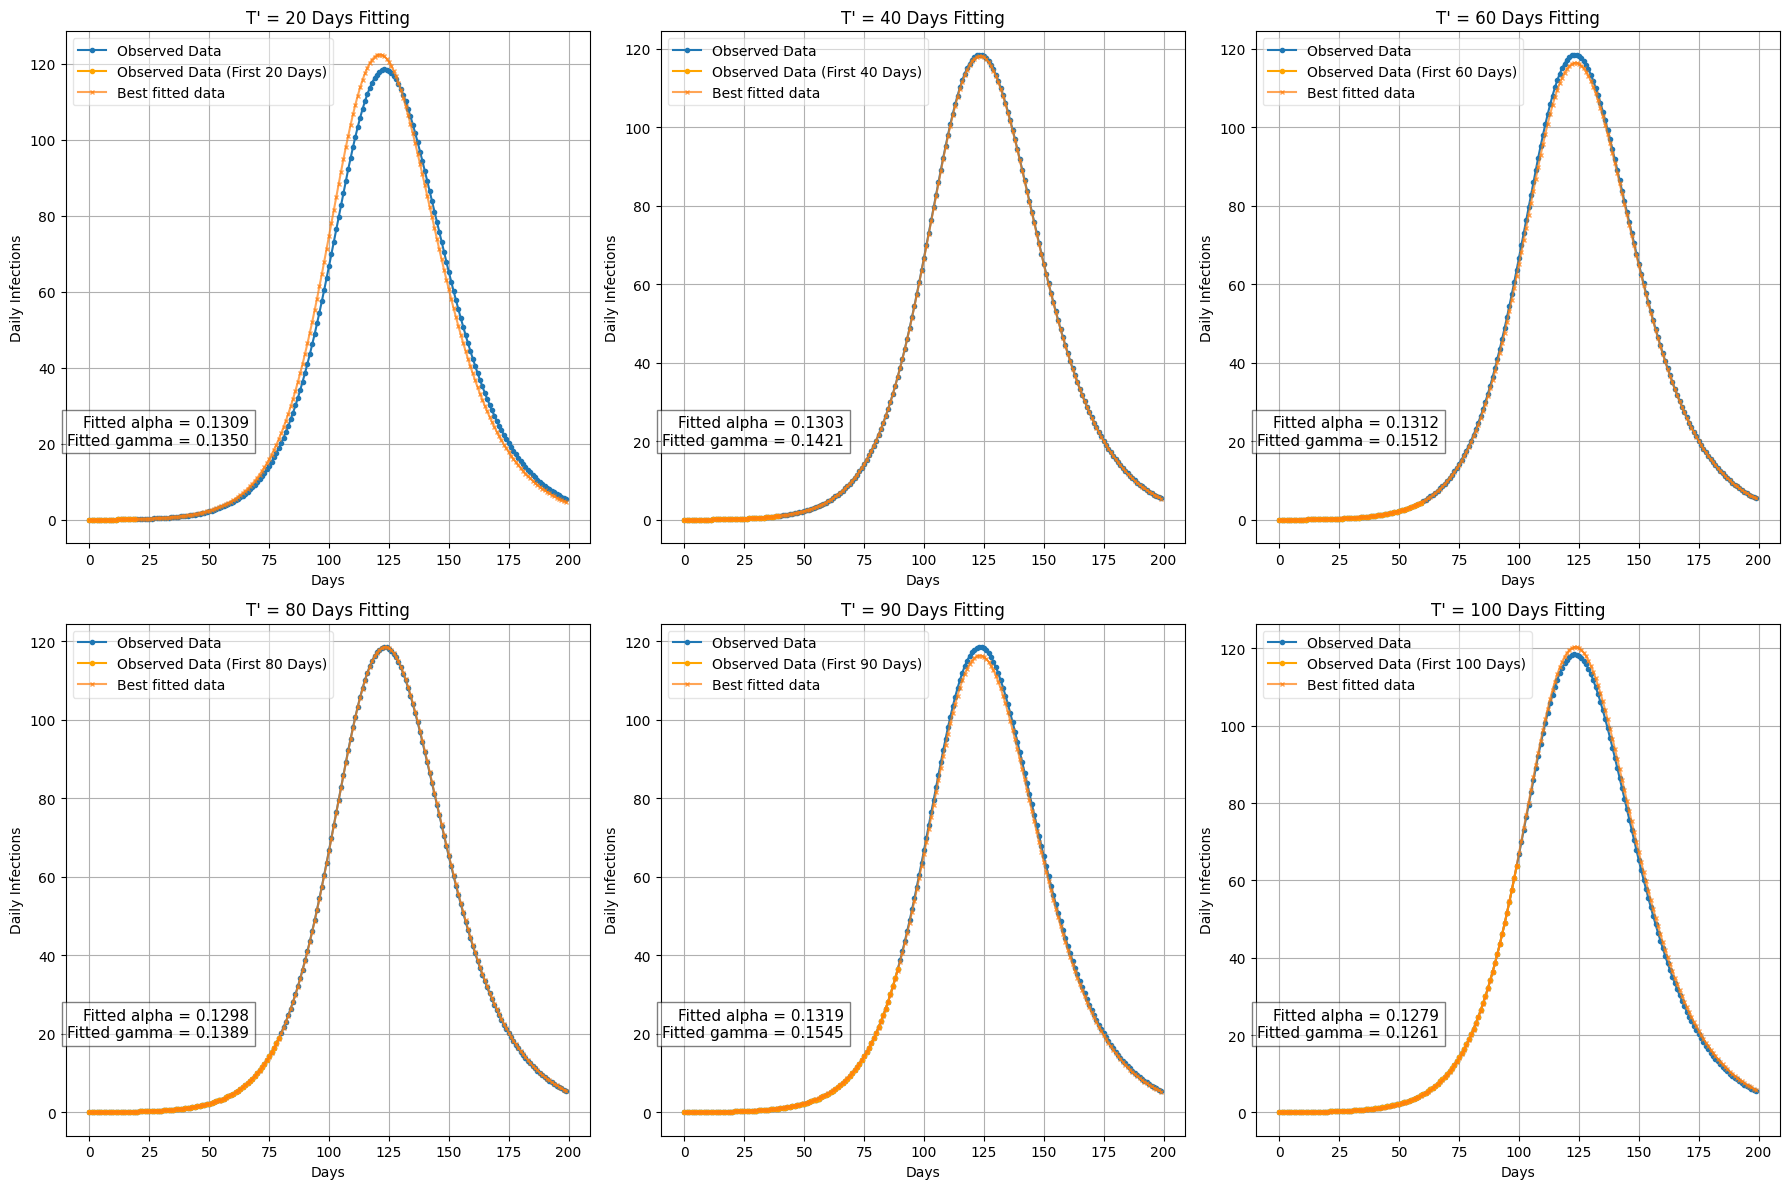

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 已知的参数
beta = 0.1
delta_E = 0.01
delta_I = 0.01
delta_H = 0.01

# 总人口数量
N = 10000

# 初始条件
S0 = N-1
E0 = 1
I0 = 0
H0 = 0
R0 = 0

# 生成完整数据集的天数
T = 200

# 用于生成数据的已知 alpha 和 gamma
alpha_true = 0.13
gamma_true = 0.14

# 生成合成数据的函数
def generate_data(alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T):
    S = np.zeros(T)
    E = np.zeros(T)
    I = np.zeros(T)
    H = np.zeros(T)
    R = np.zeros(T)
    daily_infections = np.zeros(T)

    S[0], E[0], I[0], H[0], R[0] = S0, E0, I0, H0, R0

    for t in range(1, T):
        S[t] = S[t-1] - ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1]
        E[t] = E[t-1] + ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1] - (beta + delta_E) * E[t-1]
        I[t] = I[t-1] + beta * E[t-1] - gamma * I[t-1]
        H[t] = H[t-1] + gamma * I[t-1] - delta_H * H[t-1]
        R[t] = R[t-1] + delta_E * E[t-1] + delta_I * I[t-1] + delta_H * H[t-1]
        daily_infections[t] = gamma * I[t]

    return daily_infections

# 目标函数，用于计算 alpha 和 gamma 的组合
def objective(alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data):
    simulated_data = generate_data(alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime)
    return np.sum((simulated_data[:T_prime] - observed_data[:T_prime]) ** 2)

# 随机搜索函数
def random_search(alpha_range, gamma_range, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data, n_samples=10000):
    best_score = float('inf')
    best_params = None

    for _ in range(n_samples):
        alpha = np.random.uniform(*alpha_range)
        gamma = np.random.uniform(*gamma_range)
        score = objective(alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data)
        if score < best_score:
            best_score = score
            best_params = (alpha, gamma)

    return best_params

# 生成完整数据集的合成观测数据
observed_daily_infections = generate_data(alpha_true, gamma_true, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T)

# 随机搜索参数范围
alpha_range = (0.01, 0.2)  # 在 0.01 到 0.2 之间随机选择 alpha
gamma_range = (0.01, 0.2)  # 在 0.01 到 0.2 之间随机选择 gamma

T_prime_list = [20, 40, 60, 80, 90, 100]  # 根据需要修改这些值

# Visualization function with multiple subplots
def plot_results_multisubplot(full_observed_data, T_prime_list, T, point_size=6):
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))
    axs = axs.flatten()

    for i, T_prime in enumerate(T_prime_list):
        # 使用随机搜索寻找最佳 alpha 和 gamma
        fitted_alpha, fitted_gamma = random_search(alpha_range, gamma_range, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, full_observed_data)

        # Generate the fitted data with the estimated alpha and gamma for T_prime
        fitted_daily_infections = generate_data(fitted_alpha, fitted_gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T)

        # Plotting the results for T_prime
        days_full = np.arange(T)
        days_prime = np.arange(T_prime)

        # Plot full observed data and the part used for fitting
        axs[i].plot(days_full, full_observed_data, 'o-', label='Observed Data', markersize=point_size)
        axs[i].plot(days_prime, full_observed_data[:T_prime], 'o-', label=f'Observed Data (First {T_prime} Days)', markersize=point_size, color='orange')

        # Plot the fitted data for T' and beyond
        axs[i].plot(days_full, fitted_daily_infections, 'x-', label=f'Best fitted data', markersize=point_size, alpha=0.7)

        # Annotate the fitted alpha and gamma values
        axs[i].text(0.35, 0.25, f'Fitted alpha = {fitted_alpha:.4f}\nFitted gamma = {fitted_gamma:.4f}',
                    transform=axs[i].transAxes, fontsize=11, verticalalignment='top', horizontalalignment='right',
                    bbox=dict(facecolor='white', alpha=0.5))
        axs[i].set_xlabel('Days')
        axs[i].set_ylabel('Daily Infections')
        axs[i].set_title(f'T\' = {T_prime} Days Fitting')
        axs[i].legend(framealpha = 0.5)
        axs[i].grid(True)

    plt.tight_layout()
    plt.show()

# 使用随机搜索后的参数绘制多子图
plot_results_multisubplot(observed_daily_infections, T_prime_list, T, point_size=3)


##有噪声的随机搜索

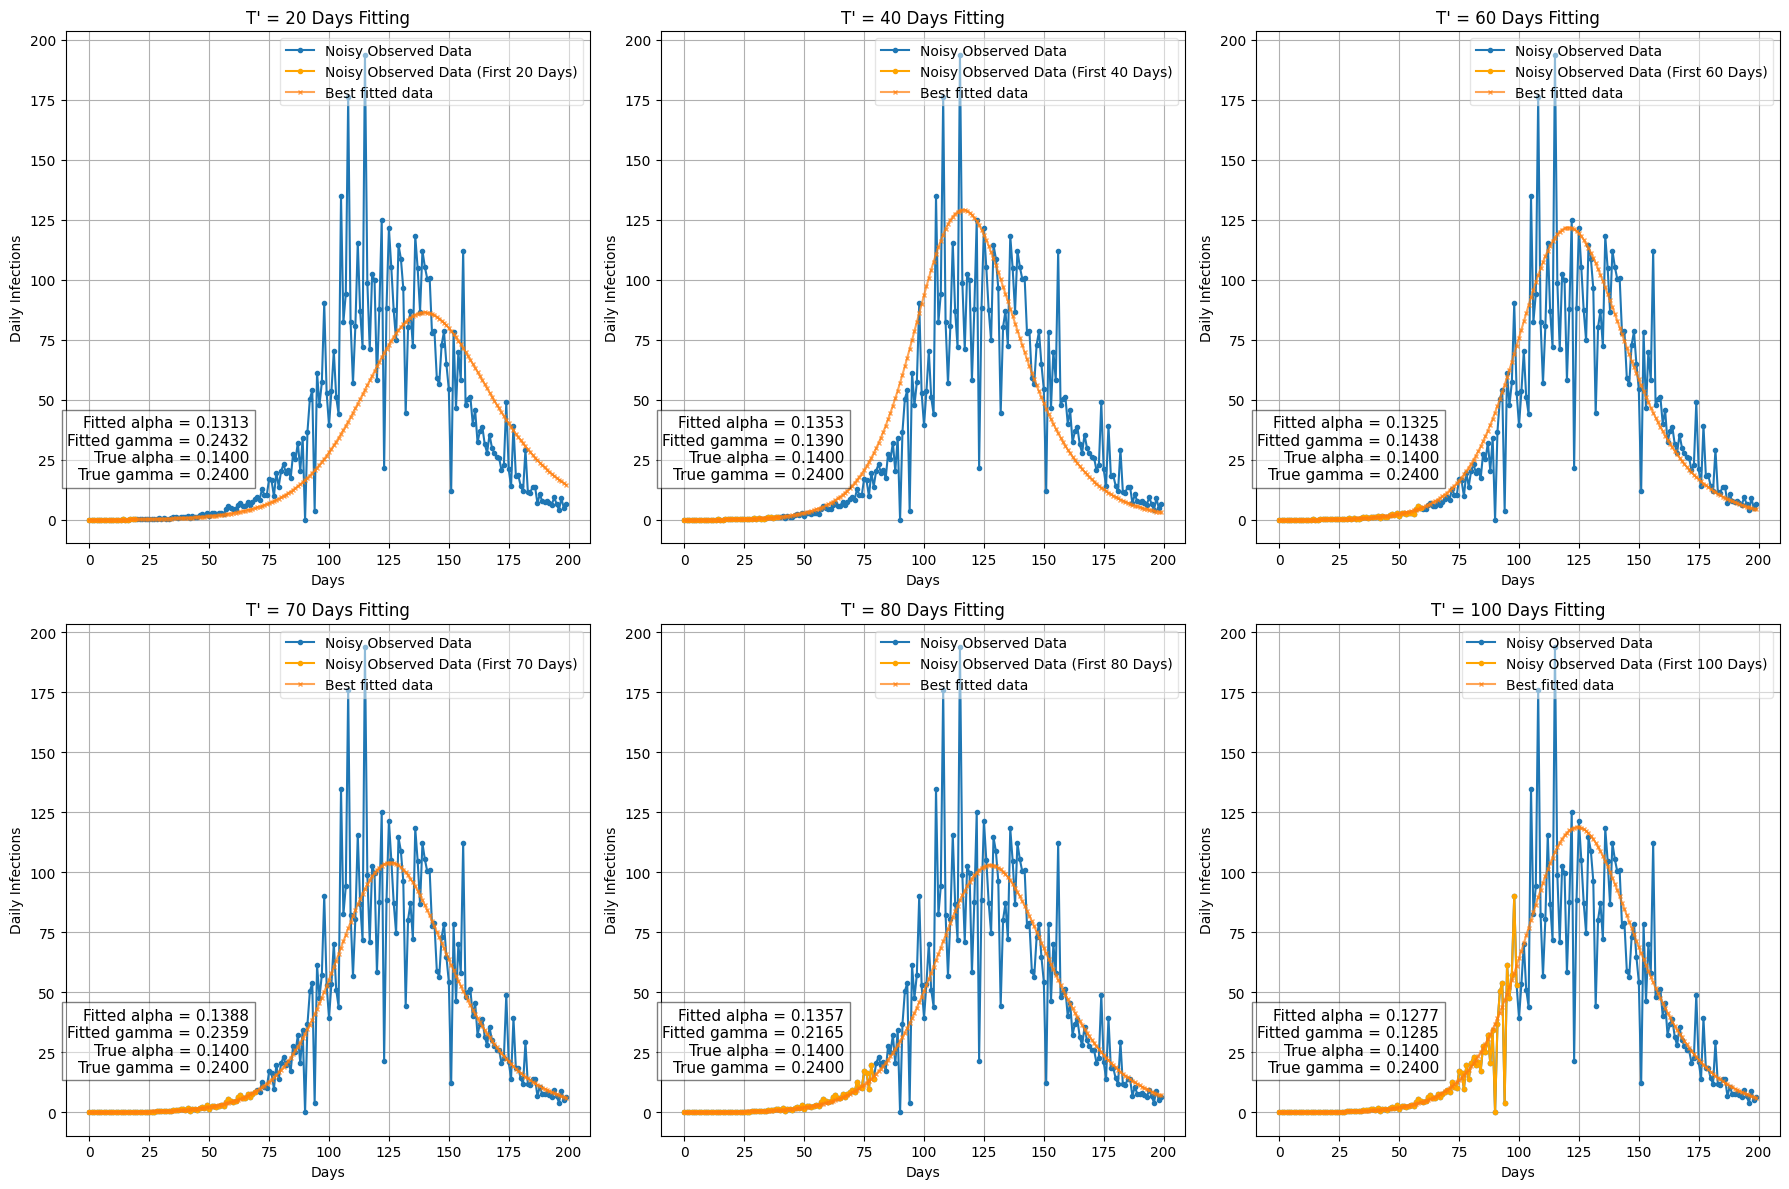

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 已知的参数
beta = 0.1
delta_E = 0.01
delta_I = 0.01
delta_H = 0.01

# 总人口数量
N = 10000

# 初始条件
S0 = N-1
E0 = 1
I0 = 0
H0 = 0
R0 = 0

# 生成完整数据集的天数
T = 200

# 用于生成数据的已知 alpha 和 gamma
alpha_true = 0.14
gamma_true = 0.24

# 生成合成数据的函数
def generate_data(alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T):
    S = np.zeros(T)
    E = np.zeros(T)
    I = np.zeros(T)
    H = np.zeros(T)
    R = np.zeros(T)
    daily_infections = np.zeros(T)

    S[0], E[0], I[0], H[0], R[0] = S0, E0, I0, H0, R0

    for t in range(1, T):
        S[t] = S[t-1] - ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1]
        E[t] = E[t-1] + ((alpha * E[t-1] / N) + (alpha * I[t-1] / N)) * S[t-1] - (beta + delta_E) * E[t-1]
        I[t] = I[t-1] + beta * E[t-1] - gamma * I[t-1]
        H[t] = H[t-1] + gamma * I[t-1] - delta_H * H[t-1]
        R[t] = R[t-1] + delta_E * E[t-1] + delta_I * I[t-1] + delta_H * H[t-1]
        daily_infections[t] = gamma * I[t]

    return daily_infections

# 替换加噪声函数，使用 epsilon 替代 alpha
def add_custom_noise(data, p=0.1, a=1, gaussian_std=0.1):
    # 生成 p 为 0 或 1 的二项分布
    p_values = np.random.binomial(1, p, size=data.shape)

    # 生成 u(-1,1) 的均匀噪声
    uniform_noise = np.random.uniform(-1, 1, size=data.shape)

    # 生成 N(0, gaussian_std) 的高斯噪声
    gaussian_noise = np.random.normal(0, gaussian_std, size=data.shape)

    # 计算 epsilon = p * a * u(-1,1) + N(0, gaussian_std)
    epsilon = p_values * a * uniform_noise + gaussian_noise

    # 生成带噪声的观测数据 Y = y * (1 + epsilon)
    noisy_data = data * (1 + epsilon)

    # 确保噪声后数据为非负数
    noisy_data[noisy_data < 0] = 0

    return noisy_data

# 使用L1范数（绝对值差异）作为目标函数
def objective(params, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data):
    alpha, gamma = params
    simulated_data = generate_data(alpha, gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime)
    return np.sum(np.abs(simulated_data[:T_prime] - observed_data[:T_prime]))

# 初始的 alpha 和 gamma 猜测值
initial_guess = [0.05, 0.05]

# 定义 alpha 和 gamma 的范围
alpha_range = (0.05, 0.3)  # 你可以根据需要调整这个范围
gamma_range = (0.05, 0.3)  # 你可以根据需要调整这个范围

# 定义随机搜索的采样次数
n_samples = 1000  # 根据需要调整采样次数

# 随机搜索函数
def random_search(objective, alpha_range, gamma_range, n_samples, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data):
    best_score = float('inf')
    best_params = None

    for _ in range(n_samples):
        alpha = np.random.uniform(*alpha_range)
        gamma = np.random.uniform(*gamma_range)
        params = [alpha, gamma]
        score = objective(params, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, observed_data)

        if score < best_score:
            best_score = score
            best_params = params

    return best_params, best_score

# 生成完整数据集的合成观测数据
observed_daily_infections = generate_data(alpha_true, gamma_true, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T)

# 向生成的数据添加自定义噪声
observed_daily_infections_noisy = add_custom_noise(observed_daily_infections, p=0.1, a=1, gaussian_std=0.2)

# 直接同时拟合 alpha 和 gamma
T_prime_list = [20, 40, 60, 70, 80, 100]  # 根据需要修改这些值

# 替换 minimize 调用为 random_search
def plot_results_with_random_search(full_observed_data, T_prime_list, T, point_size=6):
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))
    axs = axs.flatten()

    for i, T_prime in enumerate(T_prime_list):
        # 使用随机搜索找到最优的 alpha 和 gamma
        best_params, best_score = random_search(objective, alpha_range, gamma_range, n_samples, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T_prime, full_observed_data)
        fitted_alpha, fitted_gamma = best_params

        # 生成使用估计 alpha 和 gamma 的拟合数据
        fitted_daily_infections = generate_data(fitted_alpha, fitted_gamma, beta, delta_E, delta_I, delta_H, N, S0, E0, I0, H0, R0, T)

        # 绘制 T_prime 的结果
        days_full = np.arange(T)
        days_prime = np.arange(T_prime)

        # 绘制完整的观测数据和用于拟合的部分
        axs[i].plot(days_full, full_observed_data, 'o-', label='Noisy Observed Data', markersize=point_size)
        axs[i].plot(days_prime, full_observed_data[:T_prime], 'o-', label=f'Noisy Observed Data (First {T_prime} Days)', markersize=point_size, color='orange')

        # 绘制 T' 及其后的拟合数据
        axs[i].plot(days_full, fitted_daily_infections, 'x-', label=f'Best fitted data', markersize=point_size, alpha=0.7)

        # 注释拟合的 alpha 和 gamma 值
        axs[i].text(0.35, 0.25, f'Fitted alpha = {fitted_alpha:.4f}\nFitted gamma = {fitted_gamma:.4f}\nTrue alpha = {alpha_true:.4f}\nTrue gamma = {gamma_true:.4f}',
                    transform=axs[i].transAxes, fontsize=11, verticalalignment='top', horizontalalignment='right',
                    bbox=dict(facecolor='white', alpha=0.5))
        axs[i].set_xlabel('Days')
        axs[i].set_ylabel('Daily Infections')
        axs[i].set_title(f'T\' = {T_prime} Days Fitting')
        axs[i].legend(framealpha = 0.5)
        axs[i].grid(True)

    plt.tight_layout()
    plt.show()

# 使用随机搜索替换后的代码绘制多子图
plot_results_with_random_search(observed_daily_infections_noisy, T_prime_list, T, point_size=3)